In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt

# Multiple files

Create a dict with information for each cycle, specifically containing the K factor and the timeshift (`interval`).

In [3]:
experiment_description = { 
    'date' : ' 2019-03-28',
    'data folder' : r'..\data',
    'interval' : -0.5, # Add this value after experimenting with the BatchIntegrator
    'experiment name' : '20190328_DEMS_CV_STMV-330-ML_Ru0001_B_H2SO4_DEMS_COox001_pn_c_',
    'cycles': {
         # 91: {'K_prefactor': 1.15, 'K_power': 1E-7}, # TODO
         # 98: {'K_prefactor': 1.15, 'K_power': 1E-7}, # TODO
         # 99: {'K_prefactor': 1.15, 'K_power': 1E-7}, # TODO
         # 102: {'K_prefactor': 1.15, 'K_power': 1E-7}, # TODO
         # 106: {'K_prefactor': 1.15, 'K_power': 1E-7}, # TODO
         107: {'K_prefactor': 1.15, 'K_power': 1E-7},
         108: {'K_prefactor': 2.30, 'K_power': 1E-7},
         109: {'K_prefactor': 1.22, 'K_power': 1E-7},
         110: {'K_prefactor': 1.03, 'K_power': 1E-7},
         111: {'K_prefactor': 1.02, 'K_power': 1E-7},
         112: {'K_prefactor': 0.975, 'K_power': 1E-7},
         113: {'K_prefactor': 0.91, 'K_power': 1E-7},
         114: {'K_prefactor': 0.93, 'K_power': 1E-7},
         115: {'K_prefactor': 0.865, 'K_power': 1E-7},
         116: {'K_prefactor': 0.905, 'K_power': 1E-7},
         117: {'K_prefactor': 0.865, 'K_power': 1E-7},
         118: {'K_prefactor': 0.805, 'K_power': 1E-7},
         119: {'K_prefactor': 0.86, 'K_power': 1E-7},
         #120: {'K_prefactor': None, 'K_power': None} # Strong changes in flow conditions
              }
}

## Create an `CycleDescription` object
It contains dataframes and for each cycle also the actual filename is stored.

In [4]:
from iokectools.cycle_description import CycleDescription
ed = CycleDescription(experiment_description)

In [5]:
ed.dfs[0].head(2)

time  ion_current_M2  ion_current_M44  potential  current1_mA  \
0  2201.70    3.129961e-09     2.414214e-10   0.042512     0.000204   
1  2201.75    3.130182e-09     2.420842e-10   0.044574     0.000180   

   coll_current      current1  current1_muA  ion_current_M44_sBG_sub  \
0           NaN  2.039014e-07      0.203901            -3.609212e-13   
1           NaN  1.799577e-07      0.179958             3.017986e-13   

   ion_current_M44_sBG_ALS  ion_current_M44_sBG_ALS_sub  ion_current_M44_ALS  \
0            -2.730649e-12                 2.369727e-12         3.133161e-09   
1            -2.730592e-12                 3.032390e-12         3.133163e-09   

   ion_current_M44_UVS  ion_current_M44_UVS_sub  ion_current_M44_UVS_ALS  \
0         2.494328e-10            -8.011312e-12            -1.038848e-11   
1         2.494332e-10            -7.349071e-12            -1.038890e-11   

   ion_current_M44_UVS_ALS_sub  ion_current_M44_MF  ion_current_M44_MF_sub  \
0                 2.377168e-12        2.428715e-10           -1.450013e-12   
1                 3.039830e-12        2.428715e-10           -7.872937e-13   

   current1_muA_geo  
0          0.529827  
1          0.467611

In [6]:
ed.experiment_description['interval']

-0.5

## Integrate all files

All files in the collection of cycles can be integrated at once and plotted vs the applied uppper potential limit.

The data is evaluate based on the interval specified in the collection.  
Another interval can be parsed to the integrator instead.

In [7]:
integration_limits_demo = {"Q_tot_j": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_pos": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_neg": {'current': 'positive'},
                "Q_tot_M": {'lower': 0.5},
                "Q_tot_M_pos": {'lower': 0.5},
                "Q_tot_M_neg": {'lower': 0.3}, #  only usefule for noisy data
                "Q cathodic": {'upper': None, 'lower': 0.2, 'current': 'negative'},
                "Q_tot_j_sim_pos": {'upper': 1.15, 'lower': 0.6, 'current': 'positive'}, # upper 1.35 for 2 ML
                "Q_tot_j_sim_neg": {'upper': 1.0, 'lower': 0.3, 'current': 'negative'}, # 2ML: lower should be None
        }

In [8]:
from iokectools.batchintegration import BatchIntegration
# Specify another interval than that given in the exsperiment description for testing purposes
#overview = BatchIntegration(ed)#, interval=0.0)
overview = BatchIntegration(ed, limits=integration_limits_demo)#, interval=0.0)
overview.interval

-0.5

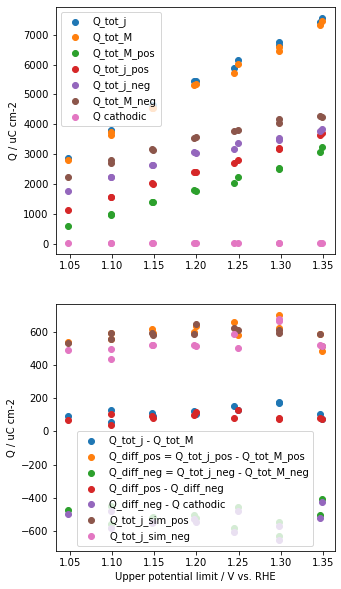

In [9]:
#overview.charges[110].summary()
overview.plot_charges()

Each cycle can be plotted individually.

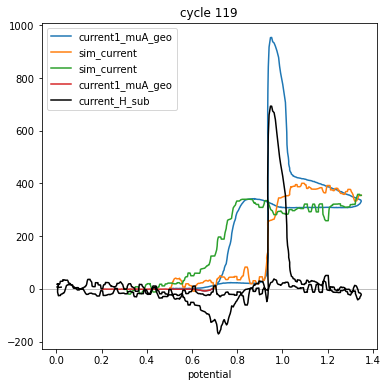

In [10]:
#overview.plot_curves('all') # plot all
fig = overview.plot_curves(119) #  plot one cycle

The same cycle but a different interval.

The interval was 0


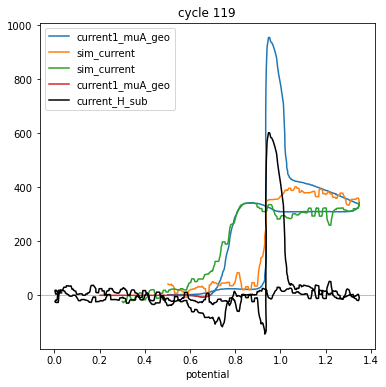

In [11]:
overview0 = BatchIntegration(ed, interval=0.0, limits=integration_limits_demo)
fig = overview0.plot_curves(119)

It is apparent that the simulatd curve is overshooting at the onset of the oxidation peak.  
This means that the amount of CO2 formed (and detected in DEMS) is larger than the Faraday current.  
This could be the case if CO is co-adsorbed with OH on the surface.  
To some extend this is probably true since there is a slightly positive current in the positive scan (blue curve).  
In that region we also observe a small MSCV signal (orange curve).  

Overall the comparison between the two figues indicates that the evaluation will strongly depend on small
variations of the adjustment of the timeshift as well as the K-factor. The changes are more apparent when
we compare the charges passed in the different CVs.

<AxesSubplot:xlabel='Upper potential limit / V vs. RHE', ylabel='Q / uC cm-2'>

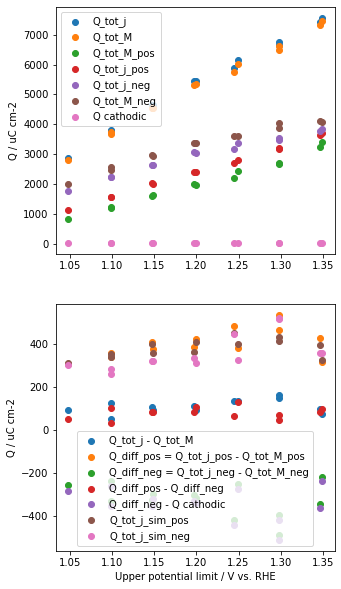

In [12]:
overview0.plot_charges()
plt.gca()
#plt.legend([])

Illustrate the integration regions

<AxesSubplot:xlabel='potential'>

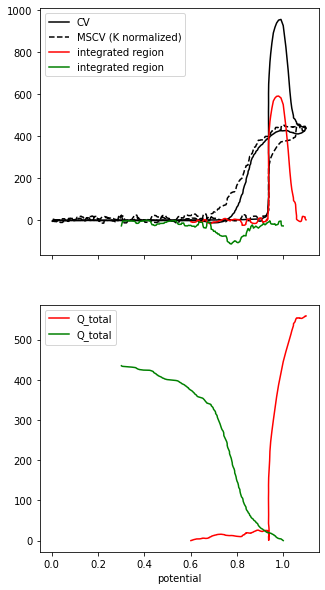

In [13]:
import matplotlib.pyplot as plt
cycle = 109
#overview_nbr = 7
#overview = statistics_K.overviews[overview_nbr]
current1 = 'current1_muA_geo'
current2 = 'current_H_sub' #'sim_current'
current2 = 'sim_current'
integration = 'Q_tot_j_sim_pos'
integration2 = 'Q_tot_j_sim_neg'


fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
overview.charges[cycle].df.plot('potential',current1, ax=ax, color='k', label='CV')
overview.charges[cycle].df.plot('potential',current2, ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
#overview_3.charges[119].charge_total_j['df'].plot('potential','current1_muA_geo', ax=ax, color='r', label='integrated region')
overview.charges[cycle].charges[integration]['df'].plot('potential', overview.charges[cycle].charges[integration]['axis'], ax=ax, color='r', label='integrated region')
overview.charges[cycle].charges[integration2]['df'].plot('potential', overview.charges[cycle].charges[integration2]['axis'], ax=ax, color='g', label='integrated region')
overview.charges[cycle].charges[integration]['df'].plot('potential', 'Q_total', ax=ax1, color='r')
overview.charges[cycle].charges[integration2]['df'].plot('potential', 'Q_total', ax=ax1, color='g')

# Evaluation of 28.03.2022 - 3.5 ML

In [3]:
experiment_description_3 = { 
    'date' : ' 2019-03-28',
    'data folder' : r'..\data',
    'interval' : -0.5, # Add this value after experimenting with the BatchIntegrator
    'experiment name' : '20190328_DEMS_CV_STMV-330-ML_Ru0001_B_H2SO4_DEMS_COox001_pn_c_',
    'cycles': {
         # # 91: {'K_prefactor': 1.15, 'K_power': 1E-7}, # TODO
         # 96: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # 97: {'K_prefactor': 1.15, 'K_power': 1E-7}, 
         # 98: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # 99: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # 100: {'K_prefactor': 1.15, 'K_power': 1E-7},
         # 102: {'K_prefactor': 1.15, 'K_power': 1E-7}, # 10 mV / s
         # 103: {'K_prefactor': 1.15, 'K_power': 1E-7}, # from here ok
         # 104: {'K_prefactor': 1.15, 'K_power': 1E-7},
         105: {'K_prefactor': 1.15, 'K_power': 1E-7},
         106: {'K_prefactor': 1.15, 'K_power': 1E-7}, # from here
         107: {'K_prefactor': 1.15, 'K_power': 1E-7}, # 1.15 # 1.50
         108: {'K_prefactor': 2.30, 'K_power': 1E-7}, # 2.30 # 2.70 # eventually a bubble in the system
         109: {'K_prefactor': 1.22, 'K_power': 1E-7}, # 1.22 # 1.45
         110: {'K_prefactor': 1.03, 'K_power': 1E-7}, # 1.03 # 1.20
         111: {'K_prefactor': 1.02, 'K_power': 1E-7}, # 1.02 # 1.20
         112: {'K_prefactor': 0.975, 'K_power': 1E-7}, # 0.975 # 1.15
         113: {'K_prefactor': 0.915, 'K_power': 1E-7}, # 0.95 # 1.12
         114: {'K_prefactor': 0.93, 'K_power': 1E-7}, # 0.93 # 1.10
         115: {'K_prefactor': 0.865, 'K_power': 1E-7},
         116: {'K_prefactor': 0.905, 'K_power': 1E-7},
         117: {'K_prefactor': 0.865, 'K_power': 1E-7},
         118: {'K_prefactor': 0.805, 'K_power': 1E-7},
         119: {'K_prefactor': 0.86, 'K_power': 1E-7},
         # # 120: {'K_prefactor': None, 'K_power': None} # Strong changes in flow conditions
              }
}
from iokectools.cycle_description import CycleDescription
ed_3 = CycleDescription(experiment_description_3)

In [4]:
integration_limits_35ML = {"Q_tot_j": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_pos": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_neg": {'current': 'positive'},
                "Q_tot_M": {'lower': 0.5},
                "Q_tot_M_pos": {'lower': 0.5},
                "Q_tot_M_neg": {'lower': 0.3}, #  only usefule for noisy data
                "Q cathodic": {'upper': None, 'lower': 0.2, 'current': 'negative'},
                "Q_tot_j_sim_pos": {'upper': 1.15, 'lower': 0.6, 'current': 'positive'}, # upper 1.35 for 2 ML
                "Q_tot_j_sim_neg": {'upper': 1.0, 'lower': 0.3, 'current': 'negative'}, # 2ML: lower should be None
        }

In [5]:
from iokectools.batchintegration import BatchIntegration
# Specify another interval than that given in the exsperiment description for testing purposes
overview_3 = BatchIntegration(ed_3, interval=-0.4, K_modifier=0.00, limits=integration_limits_35ML)
overview_3.interval

-0.4

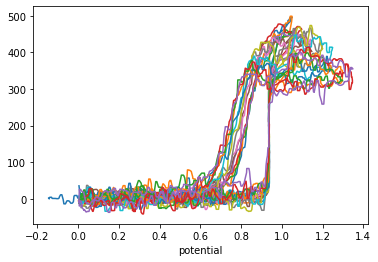

In [6]:
import matplotlib.pyplot as plt
fig, ax0 = plt.subplots(1,1)

for cycle in overview_3.cycles():
# for cycle in range(107,120,2): # every second cycle
    overview_3.charges[cycle].df.plot('potential', 'sim_current', ax=ax0, label=cycle, legend=False)#legend=False)

In [7]:
overview_3.charges[119].summary()

{'Q_tot_j': 7552.430662483971,
 'Q_tot_M': 7479.200788339972,
 'Q_tot_j - Q_tot_M': 73.22987414399904,
 'Q_tot_j_pos': 3722.265782521629,
 'Q_tot_M_pos': 3273.292162947045,
 'Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos': 448.9736195745836,
 'Q_tot_j_neg': 3842.4348429104184,
 'Q_tot_M_neg': 4212.444354379581,
 'Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg': -370.00951146916213,
 'Q_diff_neg - Q cathodic': -387.61807984045697,
 'Q cathodic': 17.608568371294844,
 'Q_diff_pos - Q_diff_neg': 78.96410810542147,
 'vertex potential': 1.3488129999999998,
 'Q_tot_j_sim_pos': 476.64149904802656,
 'Q_tot_j_sim_neg': 492.32696145799343,
 'Q_tot_j_sim_neg + cathodic': 509.93552982928827}

In [8]:
overview_3.cycles()

[105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

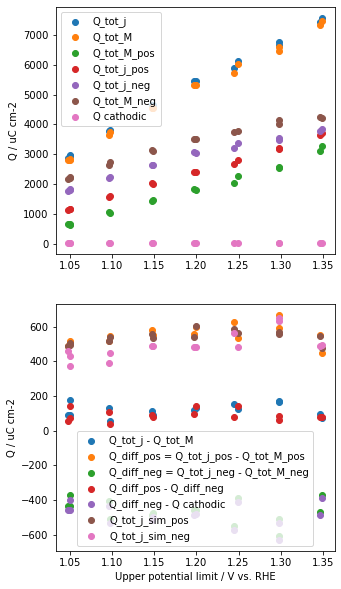

In [9]:
overview_3.plot_charges()

## Determine error bars

In [10]:
from iokectools.charge_statistics import charge_statistics
#statistics_t = charge_statistics(ed_3, time_shifts=[-0.3, -0.35, -0.4, -0.45], K_shifts=[0])
#statistics_K = charge_statistics(ed_3,cathodic_limit=0.2, time_shifts=[-0.45], K_shifts=[0])
## statistics_K = charge_statistics(ed_3,cathodic_limit=0.2, time_shifts=[-0.45], K_shifts=[0], test=True)
# statistics_K = charge_statistics(ed_3,cathodic_limit=0.2, time_shifts=[-0.45], K_shifts=[0], fixed_Ks=factors)
# statistics_K = charge_statistics(ed_3,cathodic_limit=0.2, time_shifts=[-0.45, -0.4, -0.35, -0.3, 0.1], K_shifts=[-0.01, -0.02], test=True)#, 0, 0.04])

#statistics_K = charge_statistics(ed_3,cathodic_limit=0.2, time_shifts=[-0.45, -0.4, -0.35, -0.3], K_shifts=[-0.01, -0.02], test=False, limits=integration_limits_35ML)#, 0, 0.04])

#statistics_K = charge_statistics(ed_3,cathodic_limit=0.2, time_shifts=[-0.45, -0.4], K_shifts=[-0.01, -0.02], test=False)#, 0, 0.04])
# statistics_K = charge_statistics(ed_3,cathodic_limit=0.2, time_shifts=[-0.45, -0.4], K_shifts=[-0.01, -0.02], test=False)#, 0, 0.04])
statistics_K = charge_statistics(ed_3, time_shifts=[-0.45, -0.4, -0.35], K_shifts=[0, -0.01, -0.02], test=False, limits=integration_limits_35ML)#, 0, 0.04])

1
no fixed_K:  0
no fixed_K:  1
no fixed_K:  2
no fixed_K:  3
no fixed_K:  4
no fixed_K:  5
no fixed_K:  6
no fixed_K:  7
no fixed_K:  8


(-10.0, 40.0)

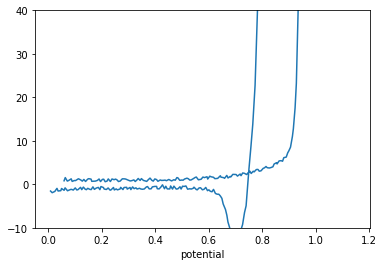

In [11]:
import matplotlib.pyplot as plt
fig, ax0 = plt.subplots(1,1)
statistics_K.overviews[0].charges[110].df.plot('potential', 'current1_muA_geo', ax=ax0, label=cycle, legend=False)#legend=False)
ax0.set_ylim(-10,40)

In [12]:
len(statistics_K.overviews)

9

In [13]:
statistics_K.vertex_limit_upper

Processing overview number:  0
Processing overview number:  1
Processing overview number:  2
Processing overview number:  3
Processing overview number:  4
Processing overview number:  5
Processing overview number:  6
Processing overview number:  7
Processing overview number:  8


1.35

In [14]:
statistics_K.df_short.head()

Q_tot_j      Q_tot_M  Q_tot_j - Q_tot_M  Q_tot_j_pos  Q_tot_M_pos  \
0  2933.791547  2838.273404          95.518142  1145.632929   647.055872   
1  3793.326408  3725.917495          67.408913  1577.105237  1053.189769   
2  4644.910977  4588.570628          56.340349  1994.313462  1444.385918   
3  5446.166251  5378.268451          67.897801  2408.953598  1849.883106   
4  6011.414641  5937.546296          73.868344  2752.862075  2194.927059   

   Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos  Q_tot_j_neg  Q_tot_M_neg  \
0                              498.577057  1793.800833  2225.704762   
1                              523.915468  2218.138515  2694.149424   
2                              549.927544  2650.597515  3160.233409   
3                              559.070493  3039.155406  3539.486688   
4                              557.935016  3280.235755  3786.665548   

   Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg  Q_diff_neg - Q cathodic  \
0                             -431.903929              -457.796653   
1                             -476.010910              -501.634812   
2                             -509.635895              -536.411004   
3                             -500.331283              -526.884743   
4                             -506.429794              -531.620713   

   Q cathodic  Q_diff_pos - Q_diff_neg  vertex potential  Q_tot_j_sim_pos  \
0   25.892724                66.673128              1.05       491.056851   
1   25.623902                47.904558              1.10       520.902518   
2   26.775109                40.291650              1.15       532.077264   
3   26.553460                58.739210              1.20       559.375159   
4   25.190919                51.505222              1.25       565.736321   

   Q_tot_j_sim_neg  Q_tot_j_sim_neg + cathodic  
0       434.464429                  460.357154  
1       432.701316                  458.325218  
2       502.205434                  528.980543  
3       500.526975                  527.080435  
4       534.047264                  559.238184

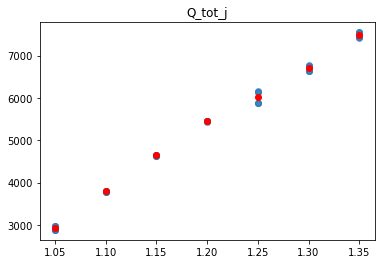

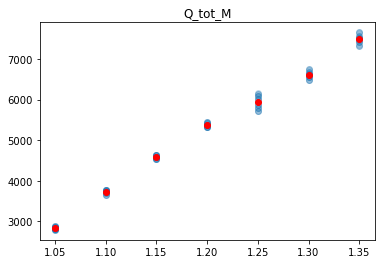

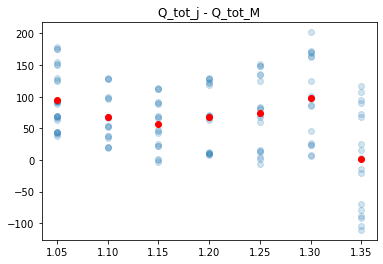

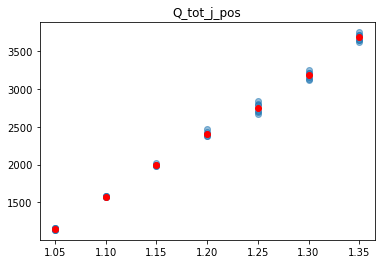

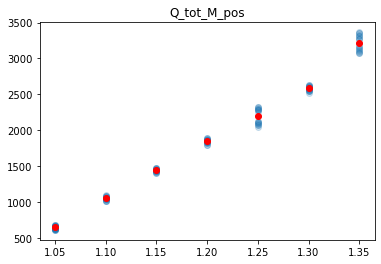

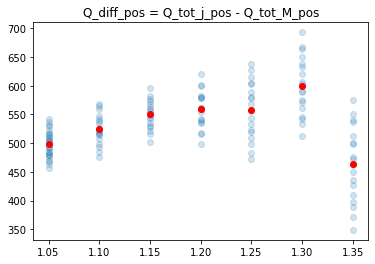

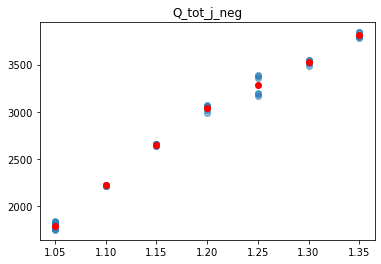

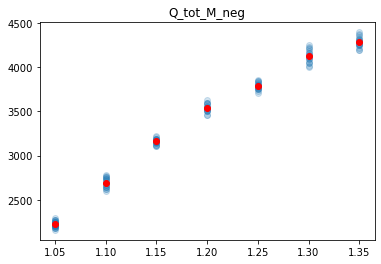

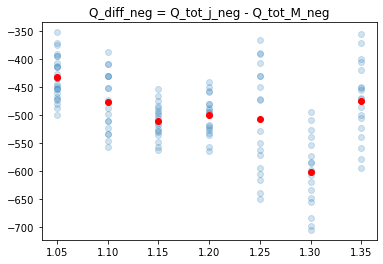

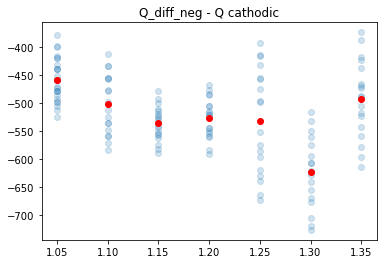

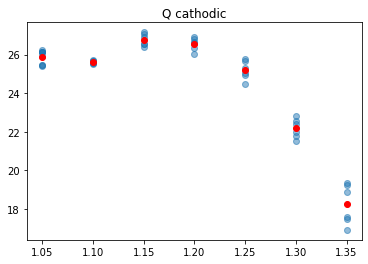

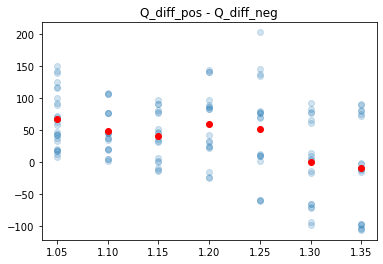

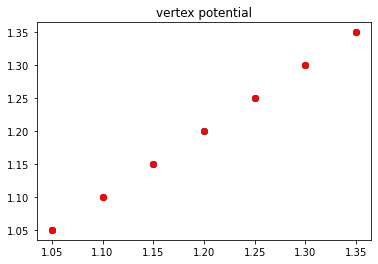

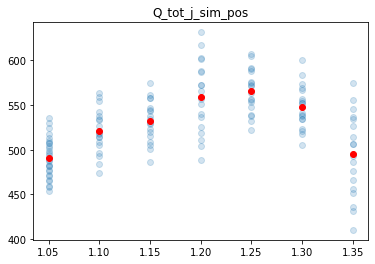

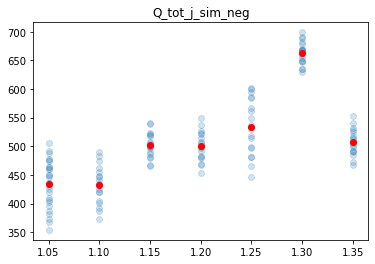

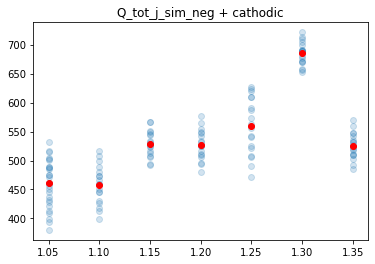

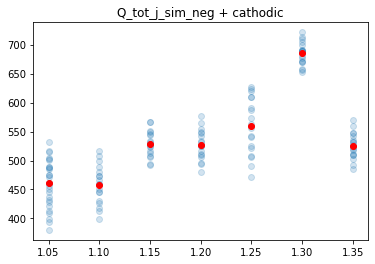

In [15]:
statistics_K.plot_short('all')

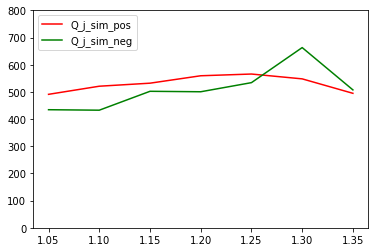

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(statistics_K.df_short['vertex potential'], statistics_K.df_short['Q_tot_j_sim_pos'], label='Q_j_sim_pos', color='red')
ax.plot(statistics_K.df_short['vertex potential'], statistics_K.df_short['Q_tot_j_sim_neg'], label='Q_j_sim_neg', color='green')
plt.ylim(0,800)
plt.legend()

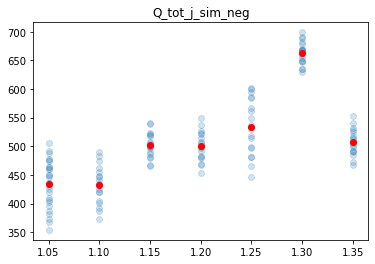

In [17]:
statistics_K.plot_short('Q_tot_j_sim_neg')

### Charge pos and neg

Text(0.5, 1.0, 'Q_tot_j_sim_pos')

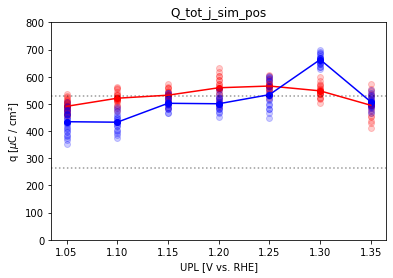

In [18]:
index = 'Q_tot_j_sim_pos'
index2 = 'Q_tot_j_sim_neg'
statistics = statistics_K
fig, ax = plt.subplots(1,1)

ax.axhline(265, alpha=0.4, linestyle=':', color='k') # 2 e transferred
ax.axhline(530, alpha=0.4, linestyle=':', color='k') # 2 e transferred

#self.df_short.plot.scatter('vertex potential', 'Q_tot_j')
ax.scatter(statistics.df['vertex potential'], statistics.df[index], alpha=0.2, color='red')
ax.scatter(statistics.df_short['vertex potential'], statistics.df_short[index], color='red')
ax.plot(statistics.df_short['vertex potential'], statistics.df_short[index], color='red')


ax.scatter(statistics.df['vertex potential'], statistics.df[index2], alpha=0.2, color='blue')
ax.scatter(statistics.df_short['vertex potential'], statistics.df_short[index2], color='blue')
ax.plot(statistics.df_short['vertex potential'], statistics.df_short[index2], color='blue')
ax.set_ylabel(r'q [$\mu$C / cm²]')
ax.set_xlabel('UPL [V vs. RHE]')
ax.set_ylim(0,800)

ax.set_title(index)

In [19]:
statistics_K.overviews[0].cycles()

[105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

NameError: name 'overview' is not defined

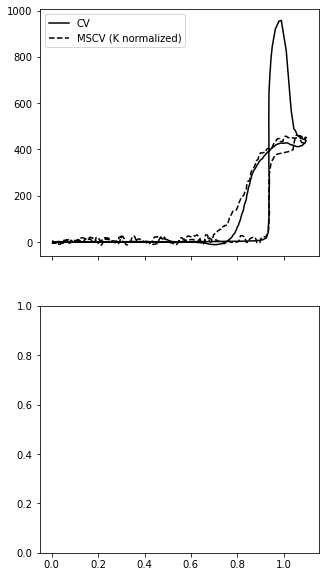

In [20]:
import matplotlib.pyplot as plt
cycle = 109
overview_nbr = 7
overview35 = statistics_K.overviews[overview_nbr]
current1 = 'current1_muA_geo'
current2 = 'current_H_sub' #'sim_current'
current2 = 'sim_current'
integration = 'Q_tot_j_sim_pos'
integration2 = 'Q_tot_j_sim_neg'


fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
overview35.charges[cycle].df.plot('potential',current1, ax=ax, color='k', label='CV')
overview35.charges[cycle].df.plot('potential',current2, ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
#overview_3.charges[119].charge_total_j['df'].plot('potential','current1_muA_geo', ax=ax, color='r', label='integrated region')
overview35.charges[cycle].charges[integration]['df'].plot('potential', overview.charges[cycle].charges[integration]['axis'], ax=ax, color='r', label='integrated region')
overview35.charges[cycle].charges[integration2]['df'].plot('potential', overview.charges[cycle].charges[integration2]['axis'], ax=ax, color='g', label='integrated region')
overview35.charges[cycle].charges[integration]['df'].plot('potential', 'Q_total', ax=ax1, color='r')
overview35.charges[cycle].charges[integration2]['df'].plot('potential', 'Q_total', ax=ax1, color='g')

In [ ]:
statistics_K.plot()

In [ ]:
statistics_K.overviews[1].plot_charges()

In [ ]:
for key, item in statistics.data.items():
    print(len(item))

In [ ]:
data = {item : [] for item in statistics.charge_indexes}
data

In [ ]:
data = {'vertex potential': [],
        'Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos': []}

for overview in overviews:
    for cycle in overview.cycles():
        data['vertex potential'].append(round(overview.charges[cycle].summary()['vertex potential'],2))
        data['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'].append(overview.charges[cycle].summary()['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'])

import pandas as pd
import numpy as np
from scipy.stats import linregress

df = pd.DataFrame(data)
df = df.sort_values('vertex potential')

def get_vertex(vertex):
    vertex_regions = [round((0.725 + 0.05*n),3) for n in range(0,20,1)]
    vertex_potentials = [round((0.75 + 0.05*n),3) for n in range(0,20,1)]
    for idx, item in enumerate(vertex_regions):
        if len(vertex_regions) == idx:
            pass
        if vertex > vertex_regions[idx] and vertex < vertex_regions[idx+1]:
            return vertex_potentials[idx]

df['vertex potential'] = df['vertex potential'].apply(get_vertex)
vertex_potentials = list(df.drop_duplicates(subset=['vertex potential']).copy()['vertex potential'].values)
# df_short = df.drop_duplicates(subset=['vertex potential']).copy()
# list(df_short['vertex potential'].values)


vertex_limit = 1.40

#remove the last value
for vertex_potential in vertex_potentials:
    if vertex_potential < vertex_limit:
        df_vertex = df[df['vertex potential'] == vertex_potential].copy()
        mean_value = df_vertex['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'].mean()
        short_data['vertex potential'].append(vertex_potential)
        short_data['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'].append(mean_value)
    
df_short = pd.DataFrame(short_data)

#remove the last 8 values
df = df[df['vertex potential'] < vertex_limit].copy()
stats = linregress(df['vertex potential'], df['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'])
stats2 = linregress(df_short['vertex potential'], df_short['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'])

vertex = np.linspace(df['vertex potential'].min(), df['vertex potential'].max(), 100)
vertex2 = np.linspace(df_short['vertex potential'].min(), df_short['vertex potential'].max(), 100)
regression = vertex*stats.slope + stats.intercept
regression2 = vertex2*stats2.slope + stats2.intercept

fig, ax = plt.subplots(1,1)

ax.scatter(df['vertex potential'], df['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'])
ax.scatter(df_short['vertex potential'], df_short['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'], color='red')
ax.plot(vertex, regression)
ax.plot(vertex2, regression2, color='red')


In [ ]:
df_short.head(1)

In [ ]:
df_short.tail(2)

In [ ]:
df_vertex = df[df['vertex potential'] == vertex_potentials[0]].copy()
df_vertex['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'].mean()

In [ ]:
time_shift = [n for n in range(30,50,5)]
time_shift

In [ ]:
df_short = df.drop_duplicates(subset=['vertex potential']).copy()
list(df_short['vertex potential'].values)


In [ ]:
list(df.drop_duplicates(subset=['vertex potential']).copy()['vertex potential'].values)

In [ ]:
stats.slope

In [ ]:
df.mean()

In [ ]:
overviews[0].charges[107].summary()['Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg']

In [ ]:
overviews[0].charges[107].summary()

In [242]:
# overview_3.df

## cycle dependent K factor

In [5]:
from iokectools.experiment_description import ExperimentDescriptions
input_parameters = {'K_min': 0.80, 'K_max': 1.17, 'K_prefactor': 1E-7, 'K_increment':0.2} # 'K_min': 0.80, 'K_max': 1.17
edn = ExperimentDescriptions(exp_description = experiment_description_3, **input_parameters)

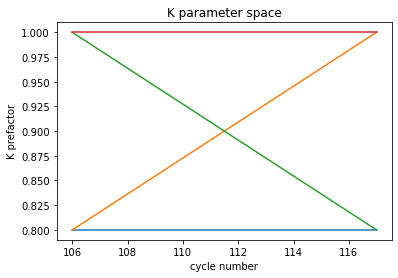

In [6]:
edn.plot_K_parameter_space

In [41]:
edn.K_lines[1]#[1]

[0.8400000000000001,
 0.8536363636363637,
 0.8809090909090911,
 0.9354545454545455,
 0.9763636363636365,
 0.99]

In [15]:
edn.exp_description

{'date': ' 2019-03-28',
 'data folder': '..\\data',
 'interval': -0.5,
 'experiment name': '20190328_DEMS_CV_STMV-330-ML_Ru0001_B_H2SO4_DEMS_COox001_pn_c_',
 'cycles': {106: {'K_prefactor': 1.15, 'K_power': 1e-07},
  107: {'K_prefactor': 1.15, 'K_power': 1e-07},
  109: {'K_prefactor': 1.22, 'K_power': 1e-07},
  119: {'K_prefactor': 0.86, 'K_power': 1e-07}}}

In [16]:
experiment_description_3

{'date': ' 2019-03-28',
 'data folder': '..\\data',
 'interval': -0.5,
 'experiment name': '20190328_DEMS_CV_STMV-330-ML_Ru0001_B_H2SO4_DEMS_COox001_pn_c_',
 'cycles': {106: {'K_prefactor': 1.15, 'K_power': 1e-07},
  107: {'K_prefactor': 1.15, 'K_power': 1e-07},
  109: {'K_prefactor': 1.22, 'K_power': 1e-07},
  119: {'K_prefactor': 0.86, 'K_power': 1e-07}}}

In [17]:
edn.exp_descriptions[3]

{'date': ' 2019-03-28',
 'data folder': '..\\data',
 'interval': -0.5,
 'experiment name': '20190328_DEMS_CV_STMV-330-ML_Ru0001_B_H2SO4_DEMS_COox001_pn_c_',
 'cycles': {106: {'K_prefactor': 1.0, 'K_power': 1e-07},
  107: {'K_prefactor': 1.0, 'K_power': 1e-07},
  109: {'K_prefactor': 1.0, 'K_power': 1e-07},
  119: {'K_prefactor': 1.0, 'K_power': 1e-07}}}

### statistics

In [30]:
len(edn.eds)

16

In [7]:
from iokectools.charge_statistics import charge_statistics
statistics_t = charge_statistics(edn.eds, cathodic_limit=0.2, time_shifts=[-0.45], K_shifts=[0], test=True)

In [8]:
import pandas as pd
df_info = pd.DataFrame(statistics_t.data)
df_info.head()

4
rejected 'Q_tot_j - Q_tot_M'
no fixed_K:  0
rejected 'Q_tot_j - Q_tot_M'
no fixed_K:  1
rejected 'Q_tot_j - Q_tot_M'
no fixed_K:  2
rejected 'Q_tot_j - Q_tot_M'
no fixed_K:  3


Exception: No overview files evaluated.

<AxesSubplot:xlabel='vertex potential', ylabel='Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'>

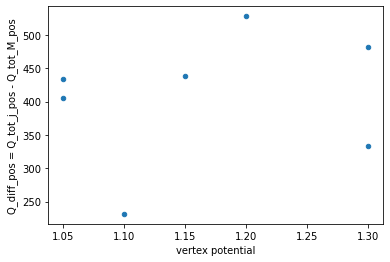

In [37]:
df = statistics_t.df
df = df[df['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos'] < 700].copy()# & df['Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos']<700].copy()
df.plot.scatter('vertex potential', 'Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos')

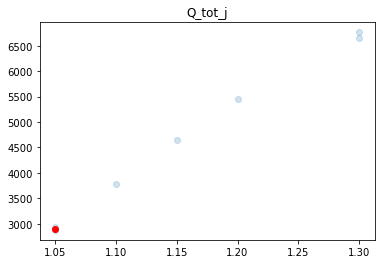

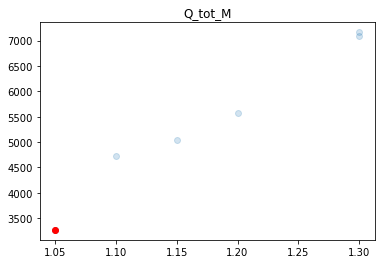

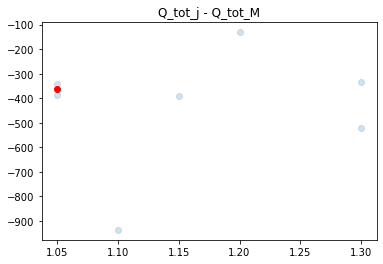

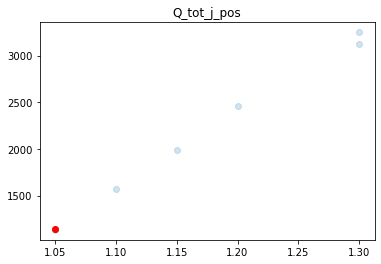

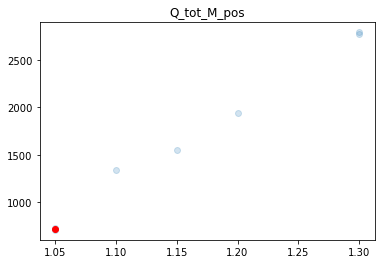

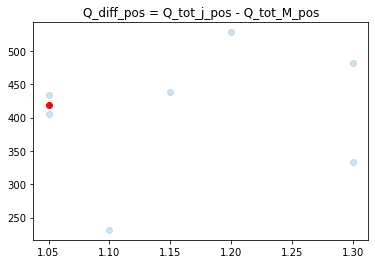

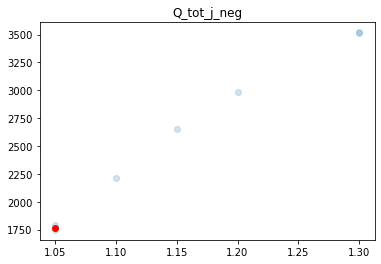

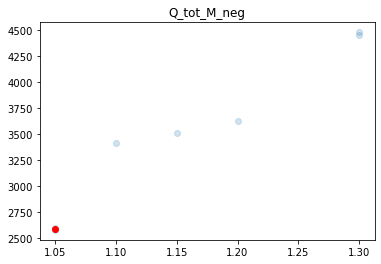

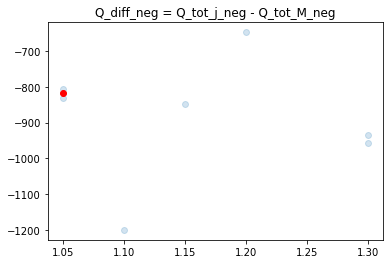

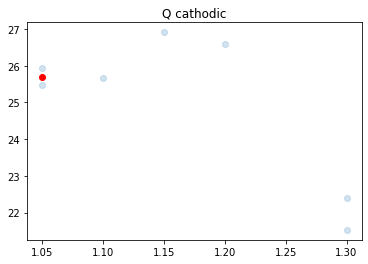

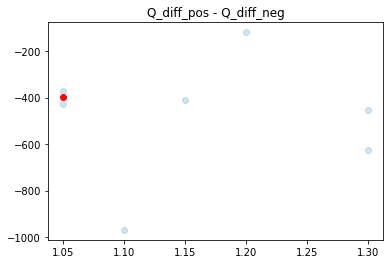

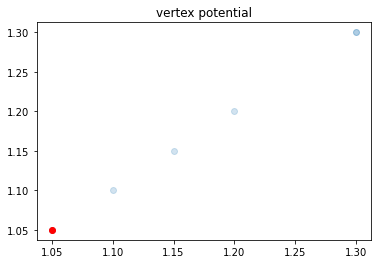

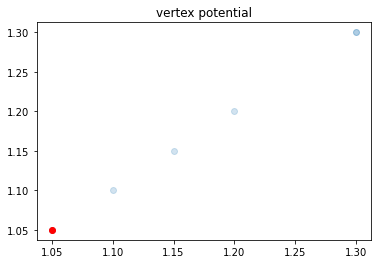

In [38]:
statistics_t.plot_short('all')

In [864]:
edn.cycles

[106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

In [867]:
len(edn.exp_descriptions)

49

In [783]:
input_parameters = {'exp_description': experiment_description_3, 'K_min': 0.80, 'K_max': 1.15, 'K_prefactor': 1E-7}
edn = ExperimentDescriptions(**input_parameters)
edn.df_cycles_K

0            1           2            3           4   \
K_prefactor  [0.8, 0.8]  [0.8, 0.85]  [0.8, 0.9]  [0.8, 0.95]  [0.8, 1.0]   
cycle        [106, 119]   [106, 119]  [106, 119]   [106, 119]  [106, 119]   

                      5           6            7             8            9   \
K_prefactor  [0.8, 1.05]  [0.8, 1.1]  [0.85, 0.8]  [0.85, 0.85]  [0.85, 0.9]   
cycle         [106, 119]  [106, 119]   [106, 119]    [106, 119]   [106, 119]   

             ...           39            40           41          42  \
K_prefactor  ...  [1.05, 1.0]  [1.05, 1.05]  [1.05, 1.1]  [1.1, 0.8]   
cycle        ...   [106, 119]    [106, 119]   [106, 119]  [106, 119]   

                      43          44           45          46           47  \
K_prefactor  [1.1, 0.85]  [1.1, 0.9]  [1.1, 0.95]  [1.1, 1.0]  [1.1, 1.05]   
cycle         [106, 119]  [106, 119]   [106, 119]  [106, 119]   [106, 119]   

                     48  
K_prefactor  [1.1, 1.1]  
cycle        [106, 119]  

[2 rows x 49 columns]

In [735]:
np.arange(1, 1.1, 0.01)

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ])

In [737]:
type(K_min)

float

In [723]:
import pandas as pd
pd.DataFrame()

Empty DataFrame
Columns: []
Index: []

# Evaluation of 19.03.2022 - 1.0 ML

In [21]:
experiment_description_1 = { 
    'date' : ' 2019-03-19',
    'data folder' : r'..\data',
    'interval' : -0.4, # Add this value after experimenting with the BatchIntegrator, minimum -0.3, max -0.5
    'experiment name' : '20190319_DEMS_CV_STMV-100-ML_Ru0001_E_H2SO4_DEMS_COox004_pn_c_',
    'cycles': {
         # 101: {'K_prefactor': 1.14, 'K_power': 1E-6},
         # 102: {'K_prefactor': 1.14, 'K_power': 1E-6}, # not working
         # 103: {'K_prefactor': 1.14, 'K_power': 1E-6}, # 0.93
         # 104: {'K_prefactor': 1.00, 'K_power': 1E-6}, # 0.95
         # 105: {'K_prefactor': 1.17, 'K_power': 1E-6}, # 1.06
         # 106: {'K_prefactor': 1.14, 'K_power': 1E-6},
         107: {'K_prefactor': 1.14, 'K_power': 1E-6}, # from here # 1.14
         108: {'K_prefactor': 1.33, 'K_power': 1E-6}, # 1.31
         109: {'K_prefactor': 1.34, 'K_power': 1E-6}, # 1.30
         110: {'K_prefactor': 1.33, 'K_power': 1E-6}, # 1.34
         111: {'K_prefactor': 1.32, 'K_power': 1E-6}, # 1.31
         112: {'K_prefactor': 1.33, 'K_power': 1E-6}, # 1.333
         113: {'K_prefactor': 1.32, 'K_power': 1E-6}, # 1.315
         114: {'K_prefactor': 1.31, 'K_power': 1E-6}, 
         115: {'K_prefactor': 1.31, 'K_power': 1E-6},
         116: {'K_prefactor': 1.30, 'K_power': 1E-6},
         117: {'K_prefactor': 1.29, 'K_power': 1E-6},
         118: {'K_prefactor': 1.29, 'K_power': 1E-6},
         119: {'K_prefactor': 1.29, 'K_power': 1E-6},
         120: {'K_prefactor': 1.275, 'K_power': 1E-6},
         # # 121: {'K_prefactor': 1.25, 'K_power': 1E-6}, # raus
              }
}
from iokectools.cycle_description import CycleDescription
ed_1 = CycleDescription(experiment_description_1)

In [22]:
integration_limits_1ML = {"Q_tot_j": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_pos": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_neg": {'current': 'positive'},
                "Q_tot_M": {'lower': 0.5},
                "Q_tot_M_pos": {'lower': 0.5},
                "Q_tot_M_neg": {'lower': 0.4}, #  only usefule for noisy data
                "Q cathodic": {'upper': None, 'lower': 0.2, 'current': 'negative'},
                "Q_tot_j_sim_pos": {'upper': 1.05, 'lower': 0.6, 'current': 'positive'}, # upper 1.35 for 2 ML
                "Q_tot_j_sim_neg": {'upper': 1.05, 'lower': 0.3, 'current': 'negative'}, # 2ML: lower should be None
        }

In [23]:
from iokectools.batchintegration import BatchIntegration
# Specify another interval than that given in the exsperiment description for testing purposes
# overview_1 = BatchIntegration(ed_1, cathodic_limit=0.2, interval=-0.4, K_modifier=-0.04)
#overview_1 = BatchIntegration(ed_1, cathodic_limit=0.2, interval=-0.4, K_modifier=-0.04)
# overview_1 = BatchIntegration(ed_1, cathodic_limit=0.2, interval=-0.5, K_modifier=-0.04,fixed_K=1.29)
#overview_1 = BatchIntegration(ed_1, cathodic_limit=0.2, interval=-0.4, K_modifier=0,fixed_K=1.28, limits=integration_limits_1ML)
#overview_1 = BatchIntegration(ed_1, interval=-0.4, K_modifier=0,fixed_K=1.28, limits=integration_limits_1ML)
overview_1 = BatchIntegration(ed_1, interval=-0.4, K_modifier=0, limits=integration_limits_1ML)

overview_1.interval

-0.4

Browse the individual cycles to adjust the K factor.  
Move the slider and update the value above in the experimental description.

Also check how much bias on the timeshift an K factor is plausible for the error calculation. In this case:  
* ts: 0 to 0.1
* K factor: $\pm$ 0.02

In [24]:
from iokectools.timeshift import Timeshift

cycle = 120

df = overview_1.charges[cycle].df.copy()
K_prefactor = overview_1._experiment_description.experiment_description['cycles'][cycle]['K_prefactor']
timeshift = Timeshift(df, K_prefactor=K_prefactor, K_power=1E-6, interval=0.0)
timeshift.interactive()

Output()

We also make the following assumption. Integrating the positive going scan of the redox CV,  
obtained by subtracting the MSCV from the COCV, should be around 520 $\mu$C cm$^{-2}$,  (`Q_tot_sim_pos`)  
if we assume that surface oxidation proceeds via a two electron process (MeO formation).

Considering the incertitude of our evaluation, values $\pm$200 could also be valid.

In [25]:
from iokectools.integrate import COIntegral
charges = COIntegral(timeshift.ts.df, K= timeshift.ts.K)
charges.summary()

no limits provided


{'Q_tot_j': 12928.79407924198,
 'Q_tot_M': 12624.646721540508,
 'Q_tot_j - Q_tot_M': 304.14735770147126,
 'Q_tot_j_pos': 6487.066946747701,
 'Q_tot_M_pos': 5737.995873548632,
 'Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos': 749.0710731990694,
 'Q_tot_j_neg': 6441.727132494271,
 'Q_tot_M_neg': 6886.650847991891,
 'Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg': -444.9237154976199,
 'Q_diff_neg - Q cathodic': -571.561036829359,
 'Q cathodic': 126.63732133173903,
 'Q_diff_pos - Q_diff_neg': 304.14735770144944,
 'vertex potential': 1.346402,
 'Q_tot_j_sim_pos': 741.2958747284349,
 'Q_tot_j_sim_neg': 623.4853678017744,
 'Q_tot_j_sim_neg + cathodic': 750.1226891335134}

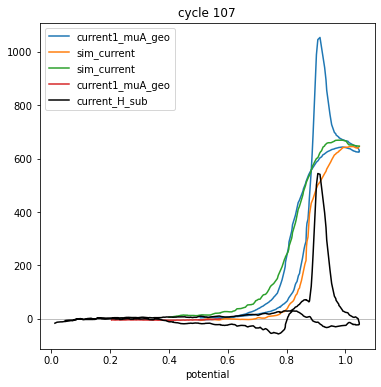

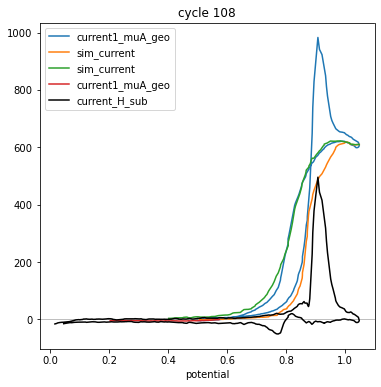

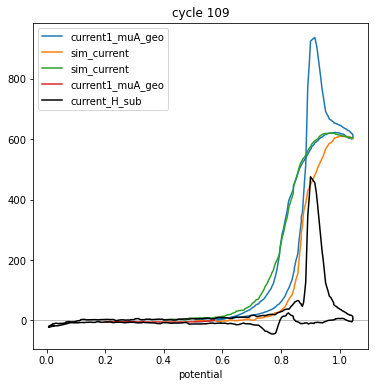

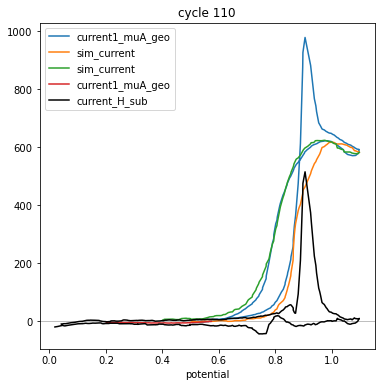

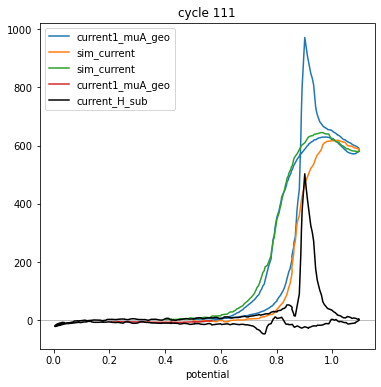

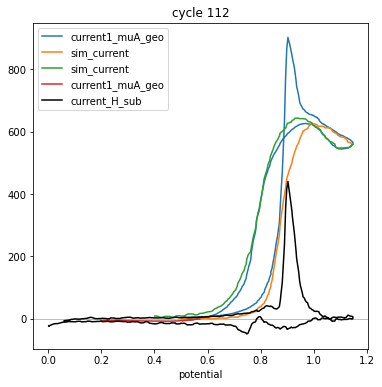

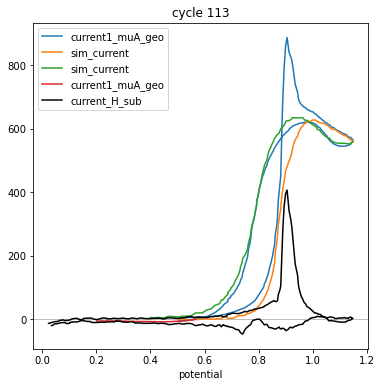

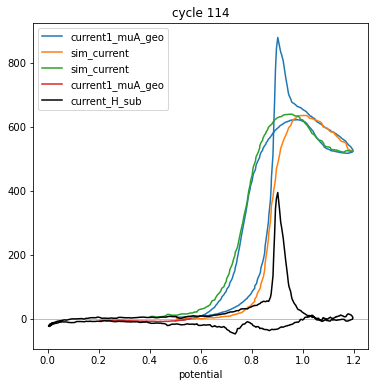

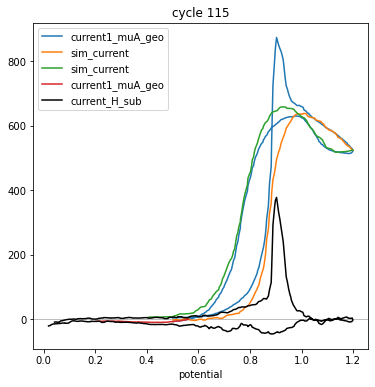

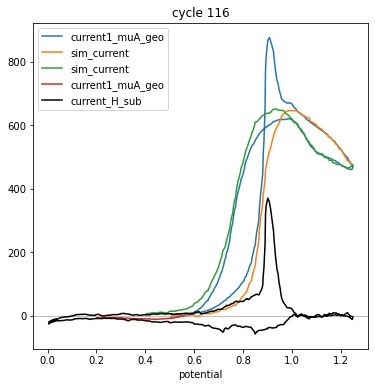

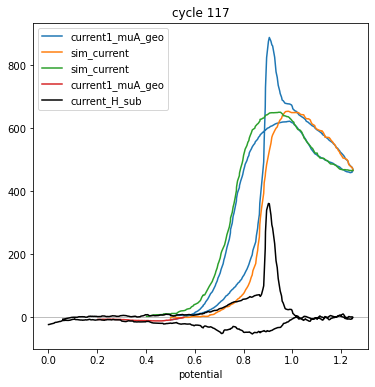

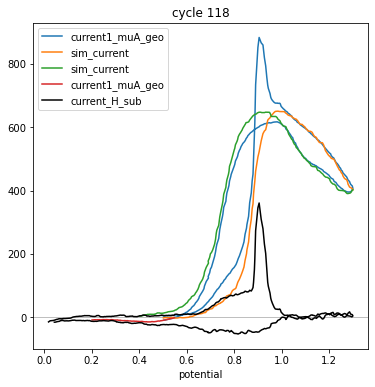

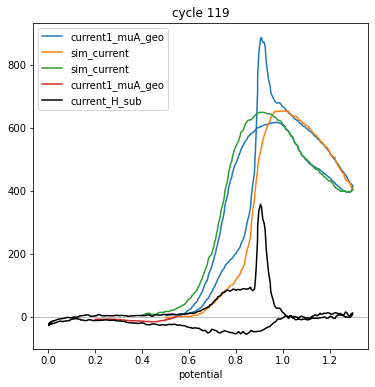

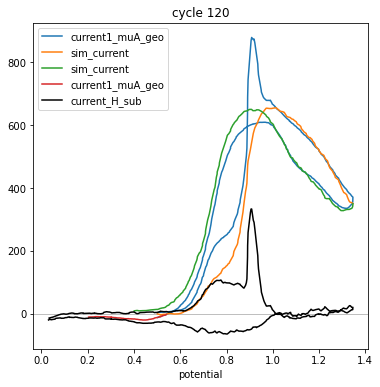

In [26]:
overview_1.plot_curves('all') # plot all
save = False
for cycle in overview_1.cycles():
    filename = overview_1.cycle_description[cycle]['filename']
    filename = filename.replace('csv','png')
    fig = overview_1.plot_curves(cycle) #  plot one cycle
    if save:
        plt.savefig(f'../evaluation/ChargeEvaluation/20190319/CV_plots/{filename}.png', dpi=400, facecolor='white')

    plt.close(fig)

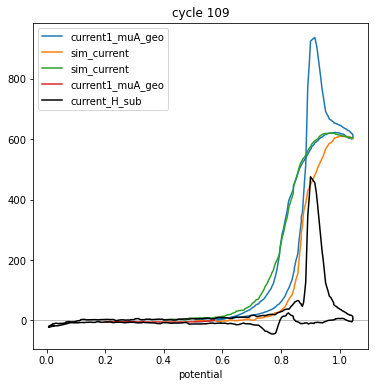

In [27]:
#overview.plot_curves('all') # plot all
fig = overview_1.plot_curves(109)
#  plot one cycle

## overview charge evolution

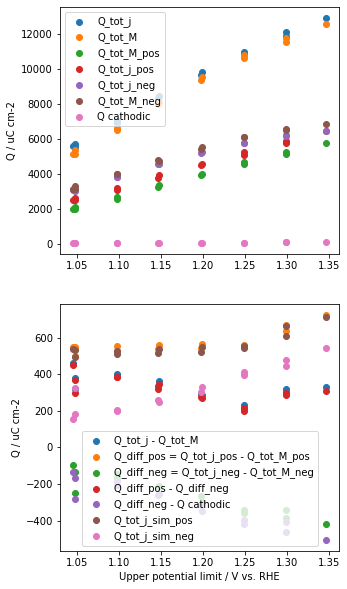

In [28]:
save = False
overview_1.plot_charges()
filename = overview_1.experiment_description['experiment name']
import matplotlib.pyplot as plt
if save:
    plt.savefig(f'../evaluation/ChargeEvaluation/20190319/{filename}.png', dpi=400, facecolor='white')

Verify integrated regions

<AxesSubplot:xlabel='potential'>

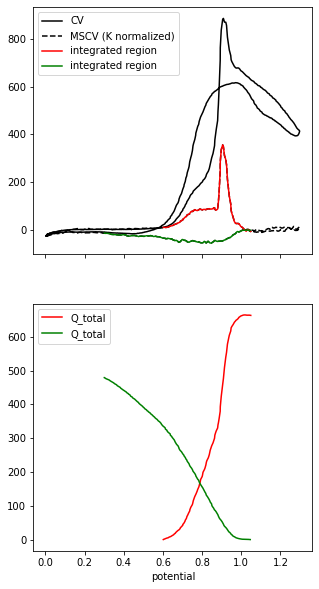

In [29]:
import matplotlib.pyplot as plt
cycle = 119
#cycle = 119
# overview_nbr = 0 # 3,4
# overview = statistics1_K.overviews[overview_nbr]
current1 = 'current1_muA_geo'
current2 = 'current_H_sub' #'sim_current'
integration_pos = 'Q_tot_j_sim_pos'
integration_neg = 'Q_tot_j_sim_neg'


fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
overview_1.charges[cycle].df.plot('potential',current1, ax=ax, color='k', label='CV')
overview_1.charges[cycle].df.plot('potential',current2, ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
#overview_3.charges[119].charge_total_j['df'].plot('potential','current1_muA_geo', ax=ax, color='r', label='integrated region')
overview_1.charges[cycle].charges[integration_pos]['df'].plot('potential', overview_1.charges[cycle].charges[integration_pos]['axis'], ax=ax, color='r', label='integrated region')
overview_1.charges[cycle].charges[integration_pos]['df'].plot('potential', 'Q_total', ax=ax1, color='r')
overview_1.charges[cycle].charges[integration_neg]['df'].plot('potential', overview_1.charges[cycle].charges[integration_neg]['axis'], ax=ax, color='g', label='integrated region')
overview_1.charges[cycle].charges[integration_neg]['df'].plot('potential', 'Q_total', ax=ax1, color='g')

##  error calculation

In [30]:
from iokectools.charge_statistics import charge_statistics
#statistics_t = charge_statistics(ed_3, time_shifts=[-0.3, -0.35, -0.4, -0.45], K_shifts=[0])
# statistics1_t = charge_statistics(ed_1,cathodic_limit=0.2, time_shifts=[-0.4], K_shifts=[0])
#statistics1_K = charge_statistics(ed_1,cathodic_limit=0.2, time_shifts=[-0.5, -0.3, -0.25, -0.2], K_shifts=[-0.02, -0.01, -0.005, 0])#, 0, 0.04]) # use this for final evaluation?
## Increasing the K factor leads to a larger differnce between the redox charge i the positive and negtive scan
# statistics1_K = charge_statistics(ed_1,cathodic_limit=0.2, time_shifts=[-0.3, -0.25, -0.2,-0.15, -0.1, -0.05, 0], K_shifts=[-0.02,-0.01, 0, 0.01, 0.02, 0.03])#, 0, 0.04])
# statistics1_K = charge_statistics(ed_1,cathodic_limit=0.2, time_shifts=[-0.3, -0.25, -0.2,-0.15, -0.1, -0.05, 0], K_shifts=[-0.03, -0.02,-0.01, 0])#, 0, 0.04])
# statistics1_K = charge_statistics(ed_1,cathodic_limit=0.2, time_shifts=[-0.3, -0.25, -0.2,-0.15, -0.1, -0.05, 0], K_shifts=[-0.04, -0.03, -0.02,-0.01])#, 0, 0.04])

# former values
# statistics1_K = charge_statistics(ed_1,cathodic_limit=0.2, time_shifts=[-0.5, -0.4, -0.35, -0.3, -0.2], K_shifts=[-0.03, -0.02,-0.01, 0, 0.01])#, 0, 0.04])
# values as of 06.02.2023
# statistics1_K = charge_statistics(ed_1,cathodic_limit=0.2, time_shifts=[-0.1, 0, -0.1], K_shifts=[-0.01, 0, 0.01])
# statistics1_K = charge_statistics(ed_1, time_shifts=[-0.1, 0, -0.1], K_shifts=[-0.01, 0, 0.01], limits=integration_limits_1ML)
statistics1_K = charge_statistics(ed_1, time_shifts=[-0.45, -0.4, -0.35], K_shifts=[-0.01, 0, 0.01], limits=integration_limits_1ML)

# Redo with a shift of +-0.005

In [31]:
statistics1_K.charge_indexes

1
no fixed_K:  0
no fixed_K:  1
no fixed_K:  2
no fixed_K:  3
no fixed_K:  4
no fixed_K:  5
no fixed_K:  6
no fixed_K:  7
no fixed_K:  8


['Q_tot_j',
 'Q_tot_M',
 'Q_tot_j - Q_tot_M',
 'Q_tot_j_pos',
 'Q_tot_M_pos',
 'Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos',
 'Q_tot_j_neg',
 'Q_tot_M_neg',
 'Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg',
 'Q_diff_neg - Q cathodic',
 'Q cathodic',
 'Q_diff_pos - Q_diff_neg',
 'vertex potential',
 'Q_tot_j_sim_pos',
 'Q_tot_j_sim_neg',
 'Q_tot_j_sim_neg + cathodic']

In [32]:
statistics1_K.vertex_limit_upper

Processing overview number:  0
Processing overview number:  1
Processing overview number:  2
Processing overview number:  3
Processing overview number:  4
Processing overview number:  5
Processing overview number:  6
Processing overview number:  7
Processing overview number:  8


1.35

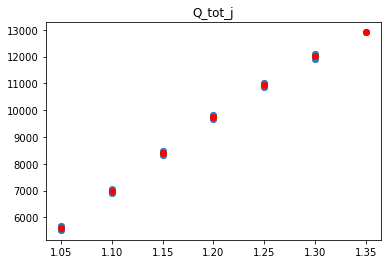

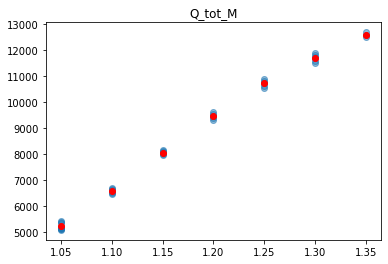

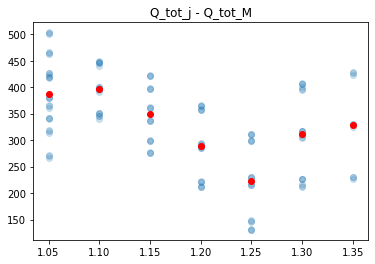

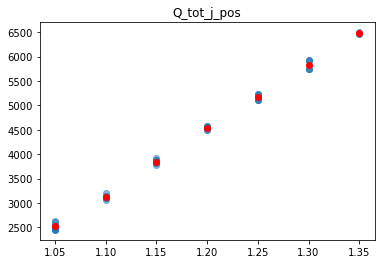

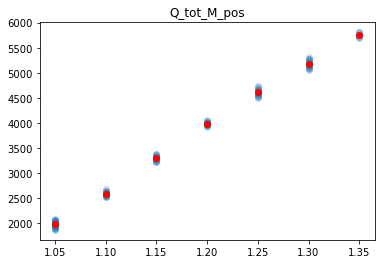

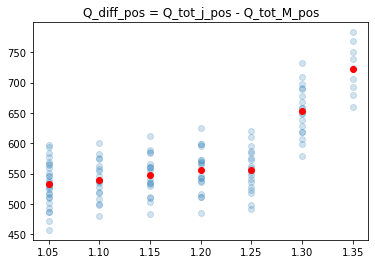

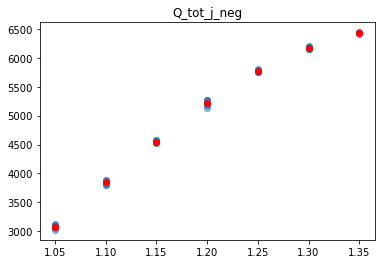

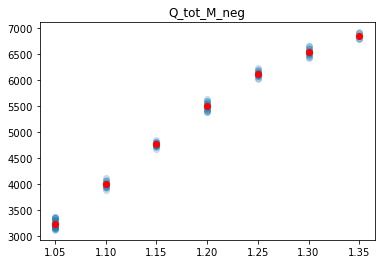

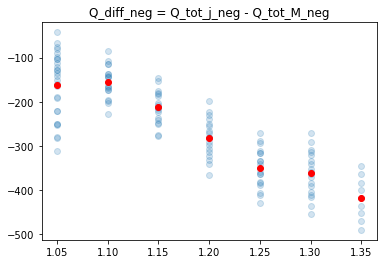

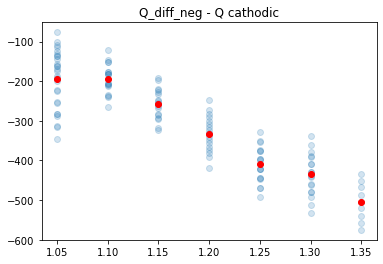

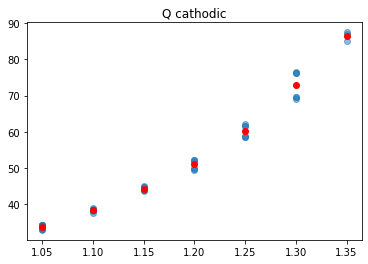

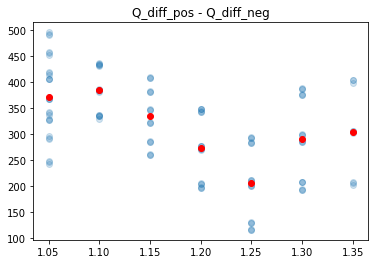

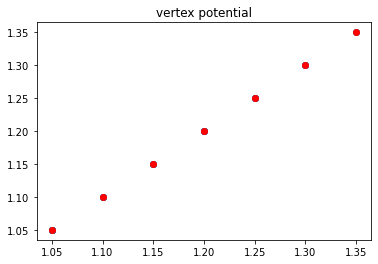

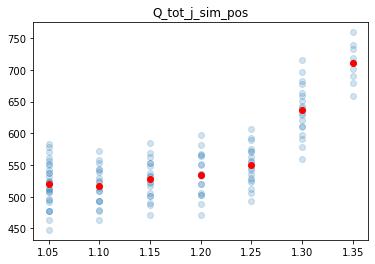

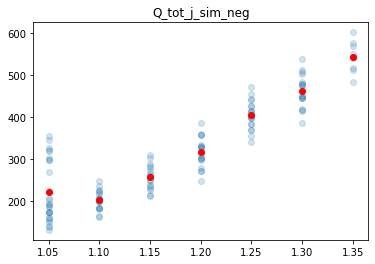

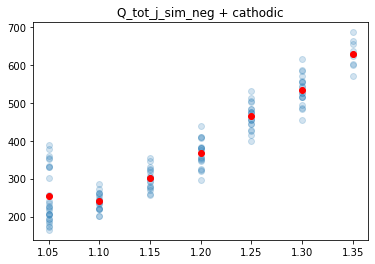

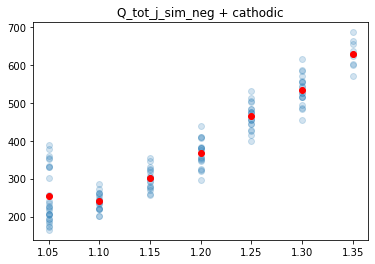

In [33]:
statistics1_K.plot_short('all')

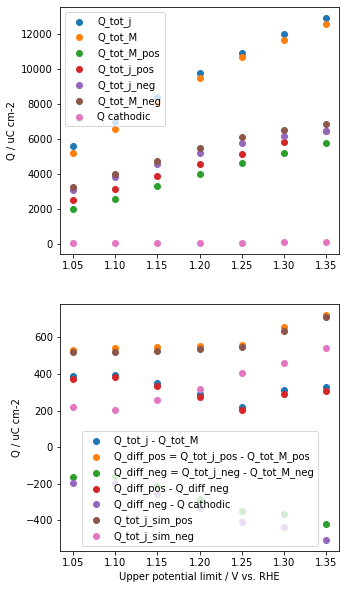

In [34]:
fig = statistics1_K.plot()

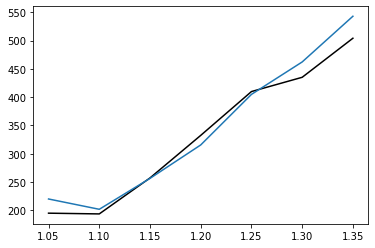

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(statistics1_K.df_short['vertex potential'], statistics1_K.df_short['Q_diff_neg - Q cathodic']*-1, color='k')
ax.plot(statistics1_K.df_short['vertex potential'], statistics1_K.df_short['Q_tot_j_sim_neg'])

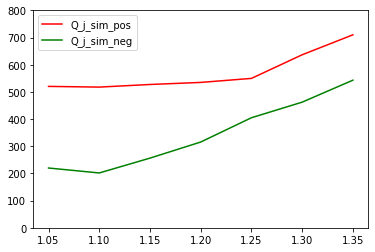

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(statistics1_K.df_short['vertex potential'], statistics1_K.df_short['Q_tot_j_sim_pos'], label='Q_j_sim_pos', color='red')
ax.plot(statistics1_K.df_short['vertex potential'], statistics1_K.df_short['Q_tot_j_sim_neg'], label='Q_j_sim_neg', color='green')
plt.ylim(0,800)
plt.legend()

In [ ]:
statistics1_K.plot_short('Q_tot_j_sim_pos')

### charge pos and neg

In [ ]:
index = 'Q_tot_j_sim_pos'
index2 = 'Q_tot_j_sim_neg'
index3 = 'Q_cathodic'
statistics = statistics1_K
fig, ax = plt.subplots(1,1)

ax.axhline(265, alpha=0.4, linestyle=':', color='k') # 2 e transferred
ax.axhline(530, alpha=0.4, linestyle=':', color='k') # 2 e transferred

#self.df_short.plot.scatter('vertex potential', 'Q_tot_j')
ax.scatter(statistics.df['vertex potential'], statistics.df[index], alpha=0.2, color='red')
ax.scatter(statistics.df_short['vertex potential'], statistics.df_short[index], color='red')
ax.plot(statistics.df_short['vertex potential'], statistics.df_short[index], color='red')


ax.scatter(statistics.df['vertex potential'], statistics.df[index2], alpha=0.2, color='blue')
ax.scatter(statistics.df_short['vertex potential'], statistics.df_short[index2], color='blue')
ax.plot(statistics.df_short['vertex potential'], statistics.df_short[index2], color='blue')

ax.scatter(statistics.df['vertex potential'], statistics.df[index3], alpha=0.2, color='orange')
ax.scatter(statistics.df_short['vertex potential'], statistics.df_short[index3], color='orange')
ax.plot(statistics.df_short['vertex potential'], statistics.df_short[index3], color='orange')

ax.set_ylabel(r'q [$\mu$C / cm²]')
ax.set_xlabel('UPL [V vs. RHE]')
ax.set_ylim(0,800)

ax.set_title(index)

In [39]:
print('timeshift: ', statistics1_K.overviews[1].interval)
print('K_modifier: ', statistics1_K.overviews[1].K_modifier)

timeshift:  -0.45
K_modifier:  0


timeshift:  -0.45
K_modifier:  0


NameError: name 'overview' is not defined

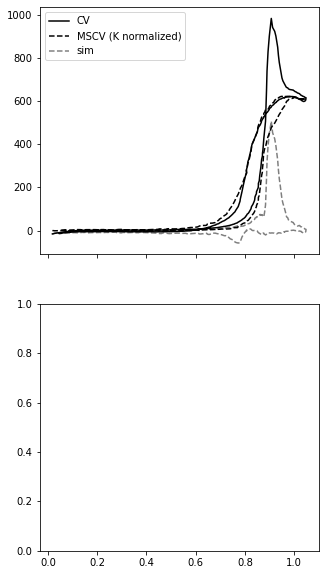

In [40]:
import matplotlib.pyplot as plt
cycle = 108
overview_nbr = 1
overviewK1 = statistics1_K.overviews[overview_nbr]
current1 = 'current1_muA_geo'
current2 = 'sim_current'
current3 = 'current_H_sub' #'sim_current'
integration = 'Q_tot_j_sim_pos'
integration2 = 'Q_tot_j_sim_neg'

print('timeshift: ', overviewK1.interval)
print('K_modifier: ', overviewK1.K_modifier)

fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
overviewK1.charges[cycle].df.plot('potential',current1, ax=ax, color='k', label='CV')
overviewK1.charges[cycle].df.plot('potential',current2, ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
overviewK1.charges[cycle].df.plot('potential',current3, ax=ax, color='k', linestyle='--', label='sim', alpha=0.5)
#overview_3.charges[119].charge_total_j['df'].plot('potential','current1_muA_geo', ax=ax, color='r', label='integrated region')
overviewK1.charges[cycle].charges[integration]['df'].plot('potential', overview.charges[cycle].charges[integration]['axis'], ax=ax, color='r', label='integrated region')
overviewK1.charges[cycle].charges[integration2]['df'].plot('potential', overview.charges[cycle].charges[integration2]['axis'], ax=ax, color='g', label='integrated region')
overviewK1.charges[cycle].charges[integration]['df'].plot('potential', 'Q_total', ax=ax1, color='r')
overviewK1.charges[cycle].charges[integration2]['df'].plot('potential', 'Q_total', ax=ax1, color='g')

AttributeError: 'NoneType' object has no attribute 'gca'

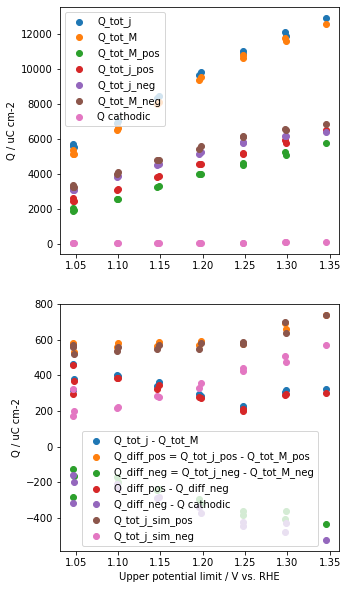

In [276]:
fig = statistics1_K.overviews[1].plot_charges()
# axis = fig.get_axes()
# axis[0].set_title('test')
fig.gca()

### Impact of parameter variation on charge evolution

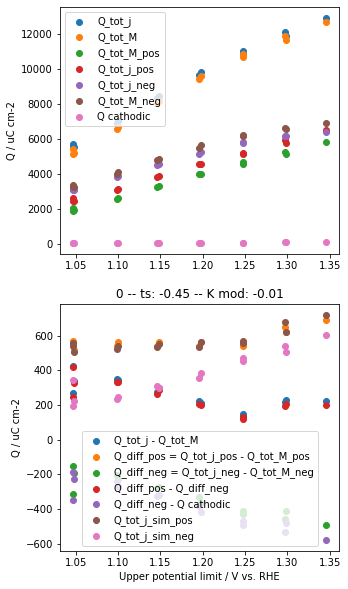

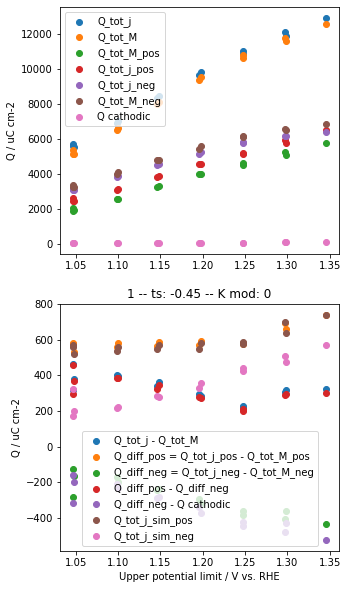

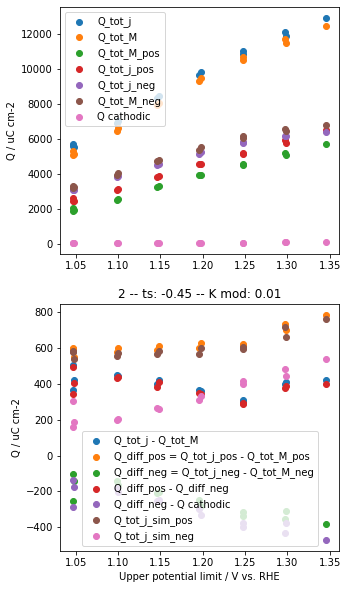

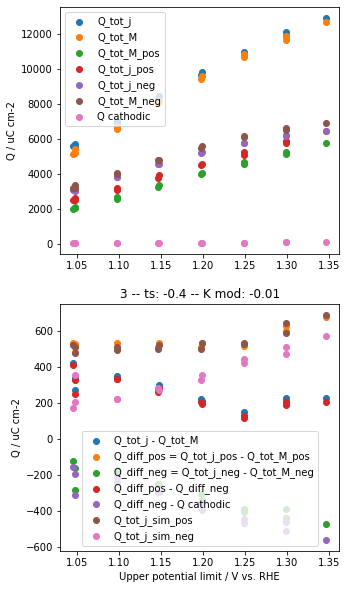

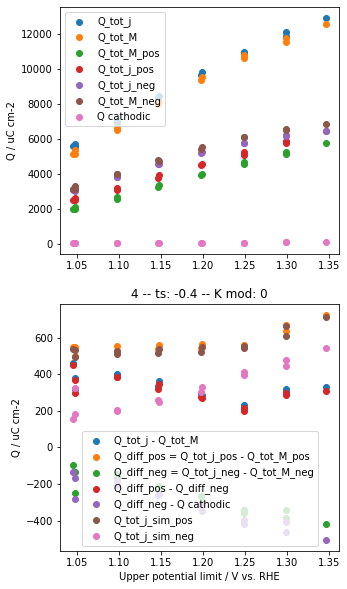

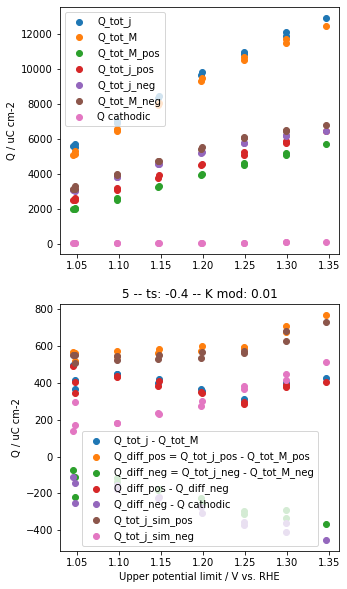

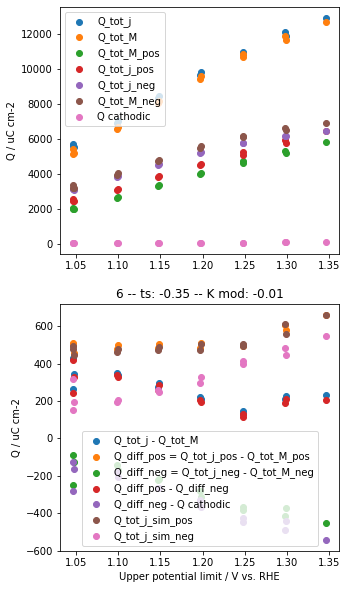

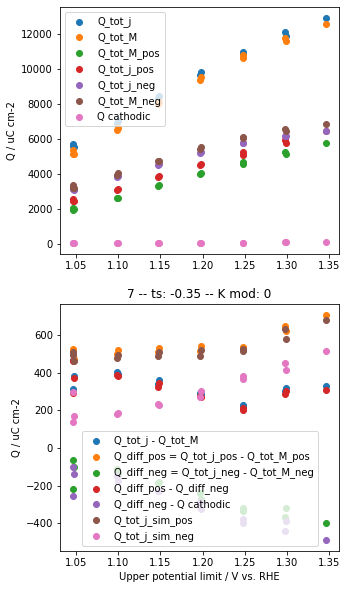

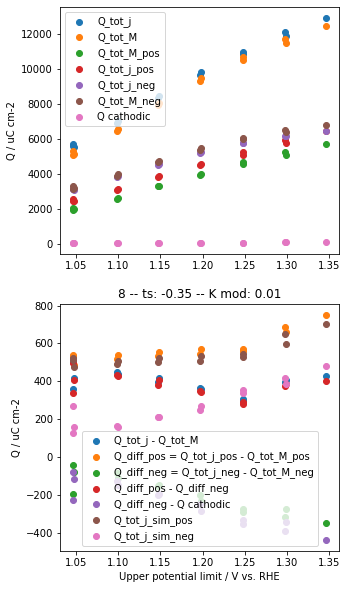

In [277]:
for idx, stat in enumerate(statistics1_K.overviews):
    stat.plot_charges()
    s_ts = 'ts: ' + str(stat.interval)
    s_K = 'K mod: ' + str(stat.K_modifier)
    axis = plt.gca()
    axis.set_title(str(idx) + ' -- ' + s_ts + ' -- ' + s_K)  

In [ ]:
overview_1.plot_curves('all') # plot all
save = False
for cycle in overview_1.cycles():
    filename = overview_1.cycle_description[cycle]['filename']
    filename = filename.replace('csv','png')
    fig = overview_1.plot_curves(cycle) #  plot one cycle
    if save:
        plt.savefig(f'../evaluation/ChargeEvaluation/20190319/CV_plots/{filename}.png', dpi=400, facecolor='white')

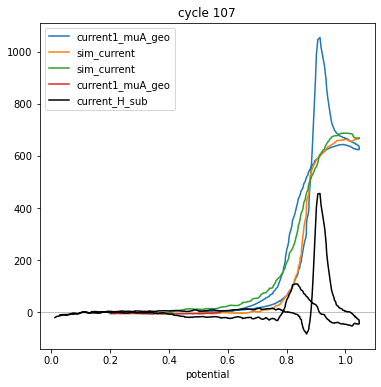

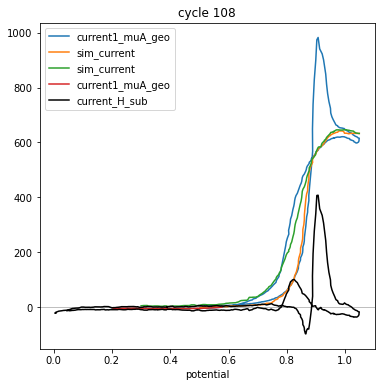

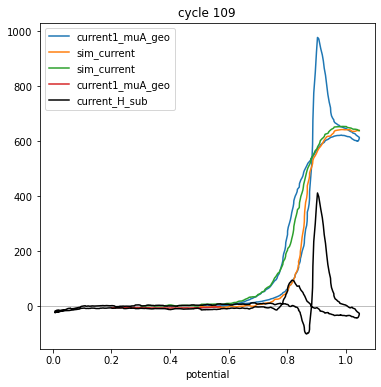

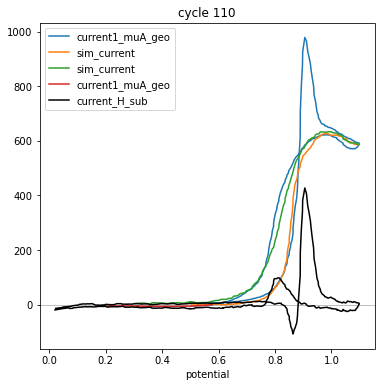

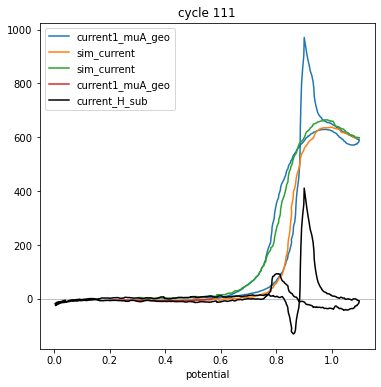

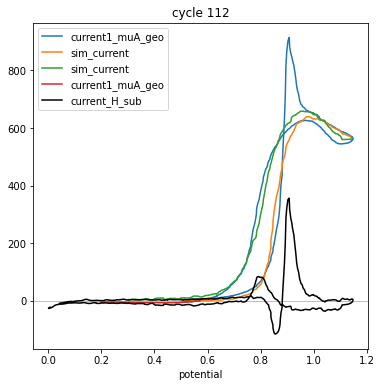

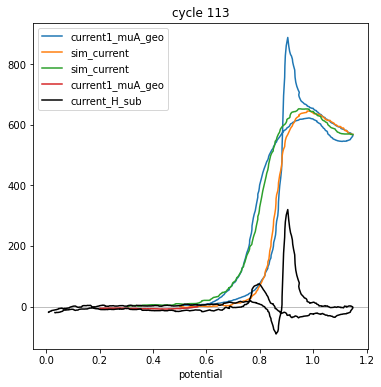

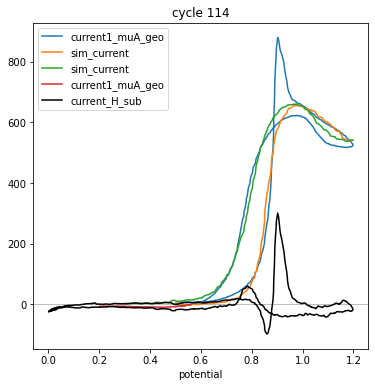

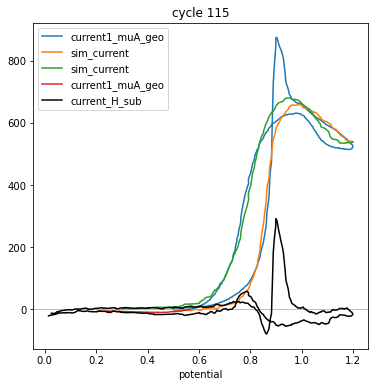

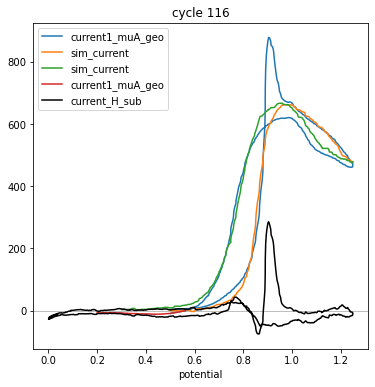

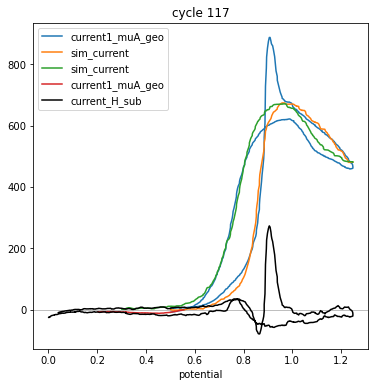

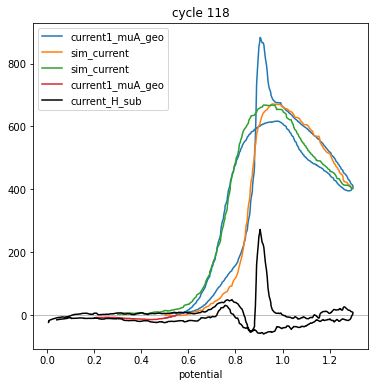

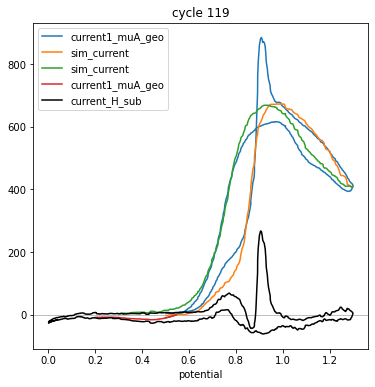

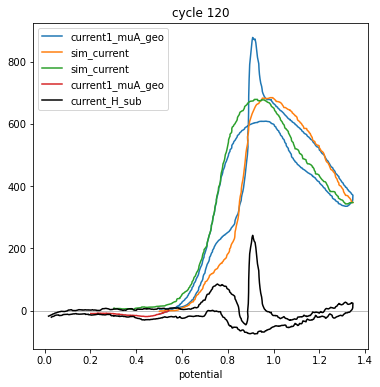

In [46]:
overview = statistics1_K.overviews[25]
for cycle in overview.cycles():
    filename = overview.cycle_description[cycle]['filename']
    filename = filename.replace('csv','png')
    fig = overview.plot_curves(cycle)
#statistics1_K.overviews[25].plot_curves('all')

In [ ]:
statistics1_K.overviews[1].plot_charges()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(statistics_K.df_short['vertex potential'], statistics_K.df_short['Q_tot_j_sim_pos'], label='Q_j_sim_pos', color='red')
ax.plot(statistics_K.df_short['vertex potential'], statistics_K.df_short['Q_tot_j_sim_neg'], label='Q_j_sim_neg', color='green')
plt.legend()

<AxesSubplot:xlabel='potential'>

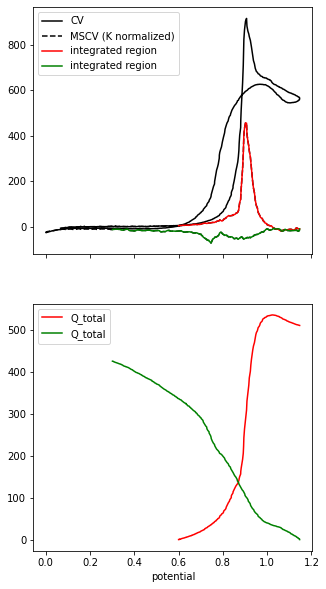

In [156]:
import matplotlib.pyplot as plt
cycle = 112
#cycle = 119
overview_nbr = 0 # 3,4
overview = statistics1_K.overviews[overview_nbr]
current1 = 'current1_muA_geo'
current2 = 'current_H_sub' #'sim_current'
integration_pos = 'Q_tot_j_sim_pos'
integration_neg = 'Q_tot_j_sim_neg'


fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
overview.charges[cycle].df.plot('potential',current1, ax=ax, color='k', label='CV')
overview.charges[cycle].df.plot('potential',current2, ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
#overview_3.charges[119].charge_total_j['df'].plot('potential','current1_muA_geo', ax=ax, color='r', label='integrated region')
overview.charges[cycle].charges[integration_pos]['df'].plot('potential', overview.charges[cycle].charges[integration_pos]['axis'], ax=ax, color='r', label='integrated region')
overview.charges[cycle].charges[integration_pos]['df'].plot('potential', 'Q_total', ax=ax1, color='r')
overview.charges[cycle].charges[integration_neg]['df'].plot('potential', overview.charges[cycle].charges[integration_neg]['axis'], ax=ax, color='g', label='integrated region')
overview.charges[cycle].charges[integration_neg]['df'].plot('potential', 'Q_total', ax=ax1, color='g')

# Evaluation of 11.04.2022 - 2 ML

The 2-ML Pt sample has a pre-oxidation peak from the beginning on.  
Hence the electrode is presumably already slightly restructured.  
In total however, the behavior is similar to that of the 1-ML sample, e.g.,  
lower charge in the negative going scan than in the positive going scan.  

In this experiment we significantly restrcutured the surface by continuous ORCs into the OER region.  
The activity first increases, but decreases with increasing number of cycles.  
We believe that first nanoparticles form on the surface, which subsequently dissolve, leaving an almost bare Ru(0001) surface.  
The latter is almost completely inactive for the COOR. (Hoster, Engstfeld)

In [38]:
experiment_description_2 = { 
    'date' : ' 2019-04-11',
    'data folder' : r'..\data',
    'interval' : 0.20, # Add this value after experimenting with the BatchIntegrator
    'experiment name' : '20190411_DEMS_CV_STMV-200-ML_Ru0001_E_H2SO4_DEMS_COox003_pn_c_',
    'cycles': {
         # 
         # 7: {'K_prefactor': 1.4, 'K_power': 1E-6},
         # 8: {'K_prefactor': 0.12, 'K_power': 1E-6},
         # 9: {'K_prefactor': 0.20, 'K_power': 1E-6}, 
         # 10: {'K_prefactor': 0.15, 'K_power': 1E-6}, # Cycles <=10 are not meaningful, possible they have another timeshift. 
         11: {'K_prefactor': 0.126, 'K_power': 1E-6},
         12: {'K_prefactor': 0.115, 'K_power': 1E-6},
         13: {'K_prefactor': 0.11, 'K_power': 1E-6},
         14: {'K_prefactor': 0.104, 'K_power': 1E-6},
         15: {'K_prefactor': 0.175, 'K_power': 1E-6},
         16: {'K_prefactor': 0.229, 'K_power': 1E-6},
         17: {'K_prefactor': 0.257, 'K_power': 1E-6},
         18: {'K_prefactor': 0.38, 'K_power': 1E-6},
         19: {'K_prefactor': 0.48, 'K_power': 1E-6}, #high voltages
         20: {'K_prefactor': 0.58, 'K_power': 1E-6}, # ok until here
         # 21: {'K_prefactor': 0.6, 'K_power': 1E-6},
         # 22: {'K_prefactor': 0.65, 'K_power': 1E-6},
         # 23: {'K_prefactor': 0.67, 'K_power': 1E-6},
         # 24: {'K_prefactor': 0.7, 'K_power': 1E-6},
         # 25: {'K_prefactor': 0.762, 'K_power': 1E-6},
         # 26: {'K_prefactor': 0.82, 'K_power': 1E-6},
         # 27: {'K_prefactor': 0.872, 'K_power': 1E-6},
         # 28: {'K_prefactor': 0.955, 'K_power': 1E-6}, # from here TODO
         # 29: {'K_prefactor': 1.0, 'K_power': 1E-6},
         # 30: {'K_prefactor': 1.03, 'K_power': 1E-6},
         # 35: {'K_prefactor': 1.044, 'K_power': 1E-6},
         # 40: {'K_prefactor': 0.93, 'K_power': 1E-6},
         # 50: {'K_prefactor': 0.483, 'K_power': 1E-6},
         # 60: {'K_prefactor': 0.516, 'K_power': 1E-6},
         # 62: {'K_prefactor': 0.516, 'K_power': 1E-6}, # last cycle
              }
}
from iokectools.cycle_description import CycleDescription
ed_2 = CycleDescription(experiment_description_2)
experiment_dfscription_2

{'date': ' 2019-04-11',
 'data folder': '..\\data',
 'interval': 0.2,
 'experiment name': '20190411_DEMS_CV_STMV-200-ML_Ru0001_E_H2SO4_DEMS_COox003_pn_c_',
 'cycles': {11: {'K_prefactor': 0.116, 'K_power': 1e-06},
  12: {'K_prefactor': 0.115, 'K_power': 1e-06},
  13: {'K_prefactor': 0.11, 'K_power': 1e-06},
  14: {'K_prefactor': 0.104, 'K_power': 1e-06},
  15: {'K_prefactor': 0.175, 'K_power': 1e-06},
  16: {'K_prefactor': 0.24, 'K_power': 1e-06},
  17: {'K_prefactor': 0.31, 'K_power': 1e-06},
  18: {'K_prefactor': 0.38, 'K_power': 1e-06},
  19: {'K_prefactor': 0.48, 'K_power': 1e-06},
  20: {'K_prefactor': 0.58, 'K_power': 1e-06}}}

In [39]:
integration_limits_default = {"Q_tot_j": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_pos": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_neg": {'current': 'positive'},
                "Q_tot_M": {'lower': 0.5},
                "Q_tot_M_pos": {'lower': 0.5},
                "Q_tot_M_neg": {'lower': 0.3}, #  only usefule for noisy data
                "Q cathodic": {'upper': None, 'lower': 0.2, 'current': 'negative'},
                "Q_tot_j_sim_pos": {'upper': 1.1, 'lower': 0.6, 'current': 'positive'}, # upper 1.35 for 2 ML
                "Q_tot_j_sim_neg": {'upper': 1.1, 'lower': 0.3, 'current': 'negative'}, # 2ML: lower should be None
        }

integration_limits_2ML = {"Q_tot_j": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_pos": {'lower': 0.5, 'current': 'positive'},
                "Q_tot_j_neg": {'current': 'positive'},
                "Q_tot_M": {'lower': 0.5},
                "Q_tot_M_pos": {'lower': 0.5},
                "Q_tot_M_neg": {'lower': 0.3}, #  only usefule for noisy data
                "Q cathodic": {'current': 'negative'},
                "Q_tot_j_sim_pos": {'upper': 1.35, 'lower': 0.6, 'current': 'positive'}, # upper 1.35 for 2 ML
                "Q_tot_j_sim_neg": {'upper': 1.1, 'current': 'negative'}, # 2ML: lowe should be None
        }


In [40]:
from iokectools.batchintegration import BatchIntegration
# Specify another interval than that given in the exsperiment description for testing purposes
#overview_2 = BatchIntegration(ed_2, interval=-0.2)
#overview_2 = BatchIntegration(ed_2, interval=0, K_modifier=0, limits=integration_limits_2ML)#, fixed_K=0.7)
overview_2 = BatchIntegration(ed_2, K_modifier=0, limits=integration_limits_2ML)
overview_2.interval

0.2

In [41]:
from iokectools.timeshift import Timeshift

cycle = 19

df = overview_2.charges[cycle].df.copy()
K_prefactor = overview_2._experiment_description.experiment_description['cycles'][cycle]['K_prefactor']
timeshift = Timeshift(df, K_prefactor=K_prefactor, K_power=1E-6, interval=0.0)
timeshift.interactive()

Output()

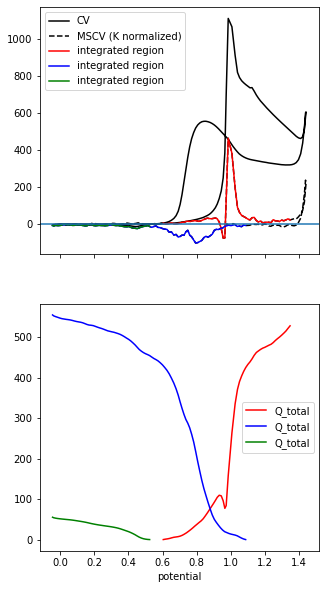

In [42]:
import matplotlib.pyplot as plt

cycle = 19
charges2 = overview_2.charges[cycle]
current1 = 'current1_muA_geo'
current2 = 'current_H_sub' #'sim_current'
integration_pos = 'Q_tot_j_sim_pos'
integration_neg = 'Q_tot_j_sim_neg'
integration_cath = 'Q cathodic'


fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
charges2.df.plot('potential',current1, ax=ax, color='k', label='CV')
charges2.df.plot('potential',current2, ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
#overview_3.charges[119].charge_total_j['df'].plot('potential','current1_muA_geo', ax=ax, color='r', label='integrated region')
charges2.charges[integration_pos]['df'].plot('potential', charges2.charges[integration_pos]['axis'], ax=ax, color='r', label='integrated region')
charges2.charges[integration_pos]['df'].plot('potential', 'Q_total', ax=ax1, color='r')

charges2.charges[integration_neg]['df'].plot('potential', charges2.charges[integration_neg]['axis'], ax=ax, color='b', label='integrated region')
charges2.charges[integration_neg]['df'].plot('potential', 'Q_total', ax=ax1, color='b')

charges2.charges[integration_cath]['df'].plot('potential', charges2.charges[integration_neg]['axis'], ax=ax, color='g', label='integrated region')
charges2.charges[integration_cath]['df'].plot('potential', 'Q_total', ax=ax1, color='g')
ax.axhline(0)

In [43]:
overview_2.interval

0.2

<AxesSubplot:xlabel='vertex potential', ylabel='Q_tot_j_sim_neg'>

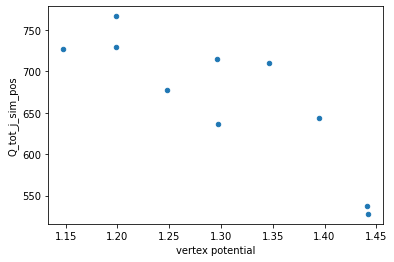

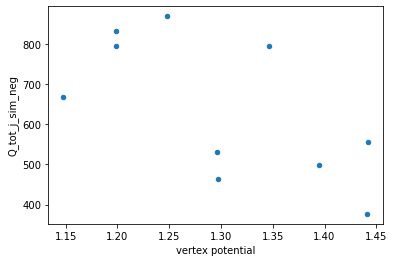

In [44]:
# overview_2.df.plot('vertex potential', ['Q_tot_j_sim_pos', 'Q_tot_j_sim_neg'], kind='scatter')
overview_2.df.plot('vertex potential', 'Q_tot_j_sim_pos', kind='scatter')
overview_2.df.plot('vertex potential', 'Q_tot_j_sim_neg', kind='scatter')


(1.1, 1.42)

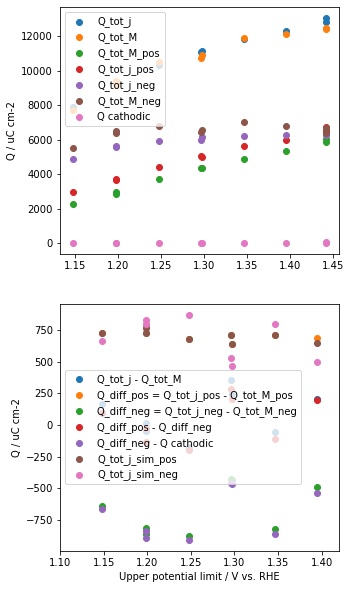

In [45]:
overview_2.plot_charges()
ax = plt.gca()
ax.set_xlim(1.1, 1.42)

## evolution of CVs

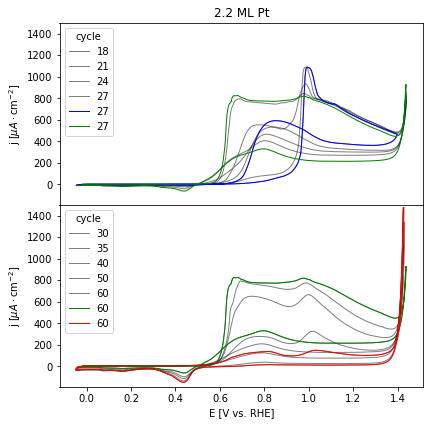

In [468]:
import matplotlib.pyplot as plt
fig, [ax0, ax1] = plt.subplots(2,1, figsize=[cm_to_inch(15),cm_to_inch(17)], sharex=True, sharey=True)

# activation

for cycle in range(18,30,3): # every second cycle
    overview_2.charges[cycle].df.plot('potential', 'current1_muA_geo', ax=ax0, label=cycle, color='k', alpha=0.5,legend=False)
overview_2.charges[18].df.plot('potential', 'current1_muA_geo', ax=ax0, label=cycle, color='blue')
overview_2.charges[30].df.plot('potential', 'current1_muA_geo', ax=ax0, label=cycle, color='green')#legend=False)

# deactivation

for cycle in [30,35,40,50,60]: 
    overview_2.charges[cycle].df.plot('potential', 'current1_muA_geo', ax=ax1, label=cycle, color='k', alpha=0.5)#legend=False)
overview_2.charges[30].df.plot('potential', 'current1_muA_geo', ax=ax1, label=cycle, color='green', legend=False)
overview_2.charges[60].df.plot('potential', 'current1_muA_geo', ax=ax1, label=cycle, color='red', legend=False)


ax0.set_ylim(-190, 1500)    

ax0.set_xlabel('E [V vs. RHE]')
ax1.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax1.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax0.set_title('2.2 ML Pt')
ax0.legend(title='cycle')
ax1.legend(title='cycle')

plt.subplots_adjust(hspace=0, right=0.98)

plt.savefig('../Figures/DPG_2023/22ML_deactivation.png', dpi=300, facecolor='white')

## charge evaluation

In [233]:
from iokectools.timeshift import Timeshift

cycle = 12


df = overview_2.charges[cycle].df.copy()
K_prefactor = overview_2._experiment_description.experiment_description['cycles'][cycle]['K_prefactor']
timeshift = Timeshift(df, K_prefactor=K_prefactor, K_power=1E-6, interval=0.0)
timeshift.interactive()

Output()

We also make the following assumption. Integrating the positive going scan of the redox CV,  
obtained by subtracting the MSCV from the COCV, should be around 520 $\mu$C cm$^{-2}$,  (`Q_tot_sim_pos`)  
if we assume that surface oxidation proceeds via a two electron process (MetalO formation).

Considering the incertitude of our evaluation, values $\pm$200 could also be valid.

In [234]:
from iokectools.integrate import COIntegral
charges = COIntegral(timeshift.ts.df, K= timeshift.ts.K, 
                     cathodic_limit=-0.2, j_sim_pos_max=1.3, 
                     limits=integration_limits_2ML)
charges.summary(round_values=True)

{'Q_tot_j': 9248.5,
 'Q_tot_M': 8846.3,
 'Q_tot_j - Q_tot_M': 402.2,
 'Q_tot_j_pos': 3669.9,
 'Q_tot_M_pos': 2641.6,
 'Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos': 1028.3,
 'Q_tot_j_neg': 5579.3,
 'Q_tot_M_neg': 6247.4,
 'Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg': -668.1,
 'Q_diff_neg - Q cathodic': -696.3,
 'Q cathodic': 28.2,
 'Q_diff_pos - Q_diff_neg': 360.2,
 'vertex potential': 1.2,
 'Q_tot_j_sim_pos': 1011.8,
 'Q_tot_j_sim_neg': 688.0,
 'Q_tot_j_sim_neg + cathodic': 716.2}

In [235]:
charges.limits

{'Q_tot_j': {'upper': 2.1982865689655187, 'lower': 0.5, 'current': 'positive'},
 'Q_tot_j_pos': {'upper': 2.1982865689655187,
  'lower': 0.5,
  'current': 'positive'},
 'Q_tot_j_neg': {'upper': 2.1982865689655187,
  'lower': -1.0464711578947363,
  'current': 'positive'},
 'Q_tot_M': {'upper': 2.1982865689655187, 'lower': 0.5, 'current': None},
 'Q_tot_M_pos': {'upper': 2.1982865689655187, 'lower': 0.5, 'current': None},
 'Q_tot_M_neg': {'upper': 2.1982865689655187, 'lower': 0.3, 'current': None},
 'Q cathodic': {'upper': 2.1982865689655187,
  'lower': -1.0464711578947363,
  'current': 'negative'},
 'Q_tot_j_sim_pos': {'upper': 1.35, 'lower': 0.6, 'current': 'positive'},
 'Q_tot_j_sim_neg': {'upper': 1.1,
  'lower': -1.0464711578947363,
  'current': 'negative'}}

In [236]:
charges.df['potential'].max()

1.1982865689655184

<AxesSubplot:xlabel='potential'>

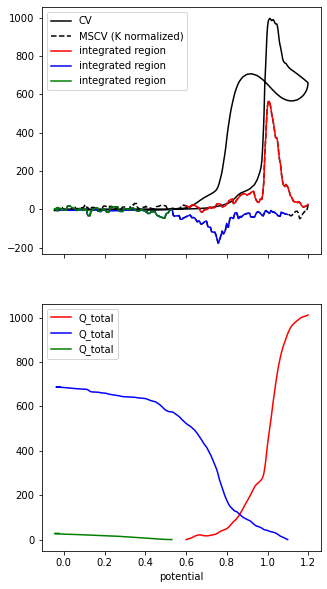

In [237]:
import matplotlib.pyplot as plt

# overview_nbr = 0 # 3,4
# overview = statistics1_K.overviews[overview_nbr]
current1 = 'current1_muA_geo'
current2 = 'current_H_sub' #'sim_current'
integration_pos = 'Q_tot_j_sim_pos'
integration_neg = 'Q_tot_j_sim_neg'
integration_cath = 'Q cathodic'


fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
charges.df.plot('potential',current1, ax=ax, color='k', label='CV')
charges.df.plot('potential',current2, ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
#overview_3.charges[119].charge_total_j['df'].plot('potential','current1_muA_geo', ax=ax, color='r', label='integrated region')
charges.charges[integration_pos]['df'].plot('potential', charges.charges[integration_pos]['axis'], ax=ax, color='r', label='integrated region')
charges.charges[integration_pos]['df'].plot('potential', 'Q_total', ax=ax1, color='r')

charges.charges[integration_neg]['df'].plot('potential', charges.charges[integration_neg]['axis'], ax=ax, color='b', label='integrated region')
charges.charges[integration_neg]['df'].plot('potential', 'Q_total', ax=ax1, color='b')

charges.charges[integration_cath]['df'].plot('potential', charges.charges[integration_neg]['axis'], ax=ax, color='g', label='integrated region')
charges.charges[integration_cath]['df'].plot('potential', 'Q_total', ax=ax1, color='g')

For high potentials, it is wise to only compare the red and green curve, as in the blue curve lost of noise has been integrated in additon.
The green curve is the pure CV current.

<AxesSubplot:>

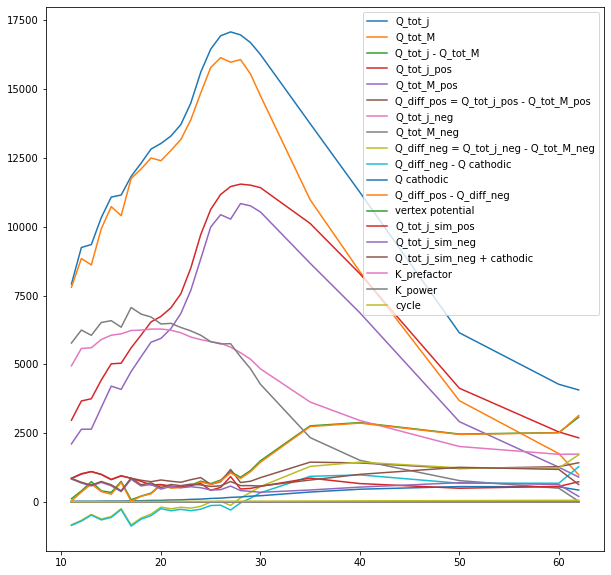

In [238]:
overview_2.df.plot(legend=True, figsize=(10,10))

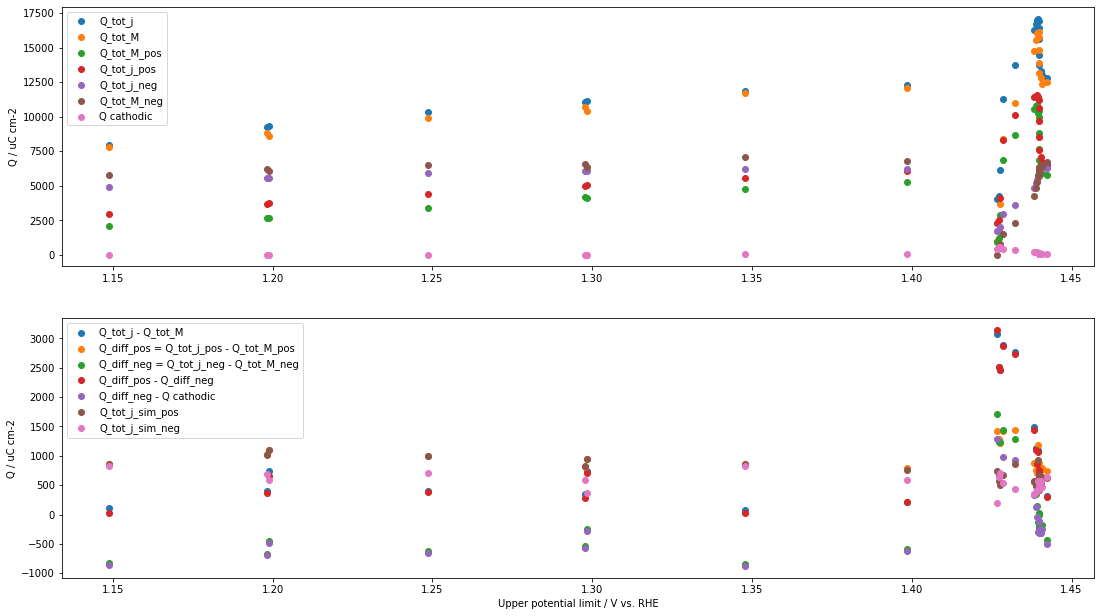

In [239]:
import matplotlib.pyplot as plt
overview_2.plot_charges()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


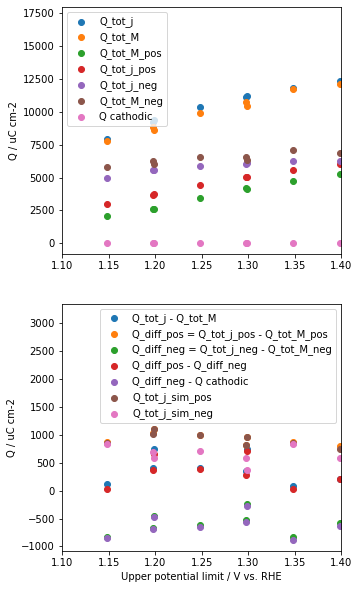

In [240]:
import matplotlib.pyplot as plt
overview_2.plot_charges()
fig = plt.gcf()
axis = fig.axes
for ax in axis:
    ax.set_xlim(1.10, 1.40)

<AxesSubplot:xlabel='cycle', ylabel='[Q cathodic]'>

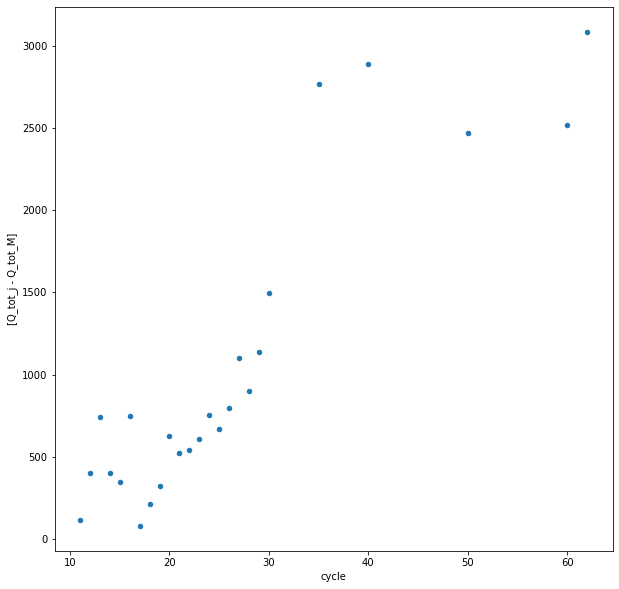

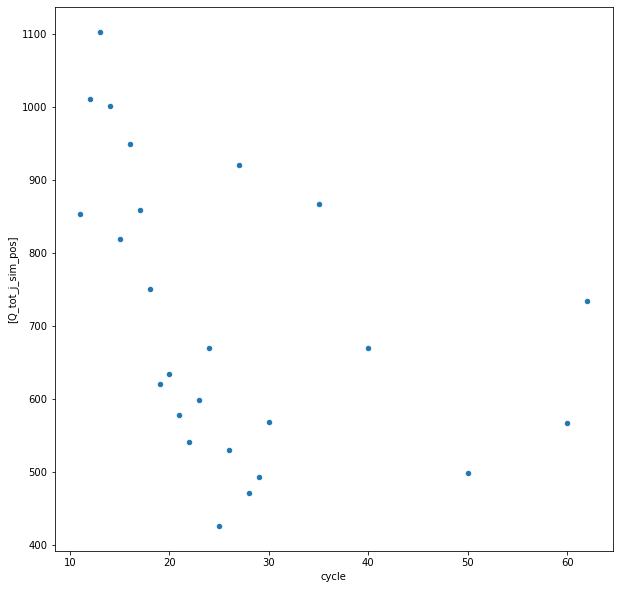

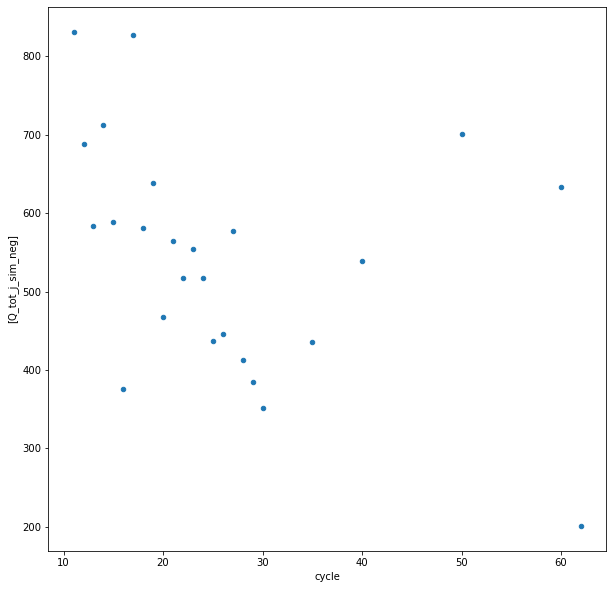

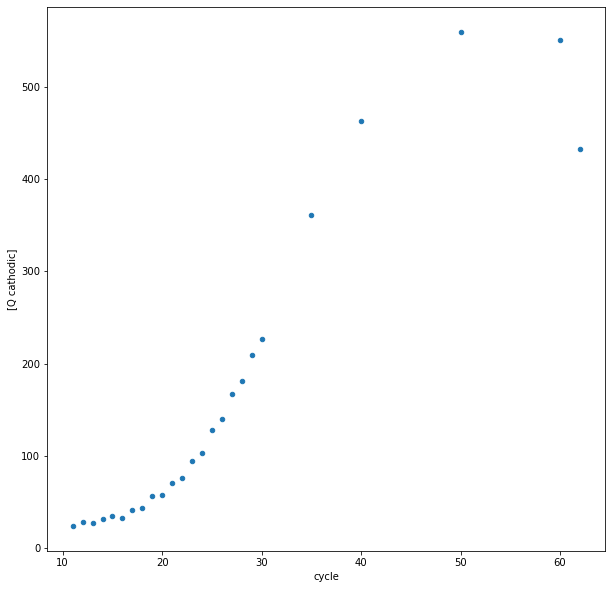

In [241]:
overview_2.df.plot.scatter(x='cycle', y=['Q_tot_j - Q_tot_M'],legend=True, figsize=(10,10))
# overview_2.df.plot.scatter(x='cycle', y=['Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg'],legend=True, figsize=(10,10))
overview_2.df.plot.scatter(x='cycle', y=['Q_tot_j_sim_pos'],legend=True, figsize=(10,10))
overview_2.df.plot.scatter(x='cycle', y=['Q_tot_j_sim_neg'],legend=True, figsize=(10,10))
overview_2.df.plot.scatter(x='cycle', y=['Q cathodic'],legend=True, figsize=(10,10))

## Determine error bar

**timeshift**
changing the timeshift by +-0.05 does not seem to affect the curves much

**K factor**  
It does not seem to be a good idead to use a more negative K factor.  
It seems that changing anything on the K larger than +-0.01 worsens the statistics and the match with the curves.

In [214]:
from iokectools.charge_statistics import charge_statistics

statistics2_K = charge_statistics(ed_2, time_shifts=[0], K_shifts=[0, 0.0025, 0.005], test=False, limits=integration_limits_2ML)#, 0, 0.04])
statistics2_K = charge_statistics(ed_2, time_shifts=[0], test=False, limits=integration_limits_2ML)#, 0, 0.04])

1
no fixed_K:  0
no fixed_K:  1
no fixed_K:  2
Processing overview number:  0
Processing overview number:  1
Processing overview number:  2
1.15
1.2
1.25
1.3
1.35
1.4
1.45


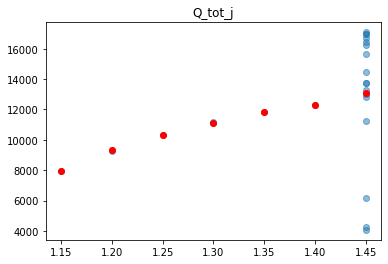

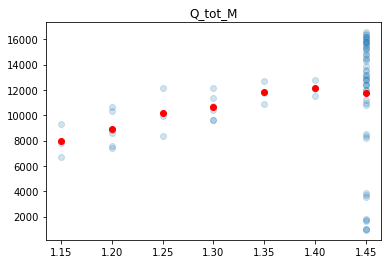

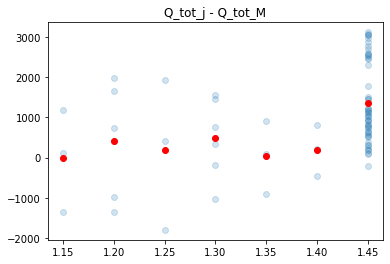

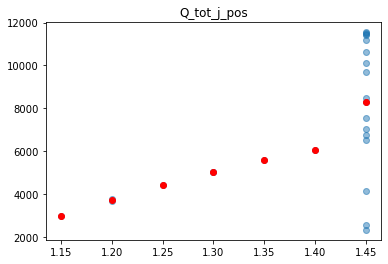

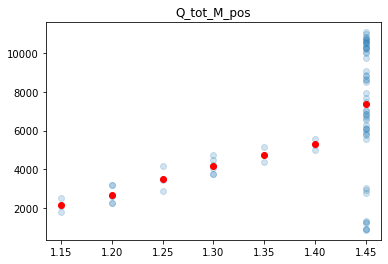

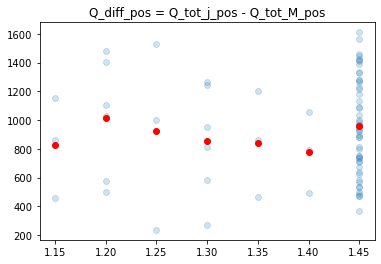

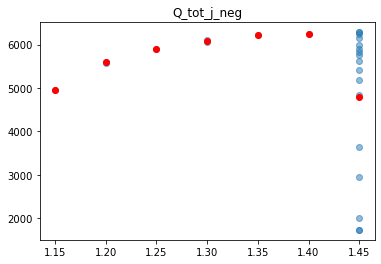

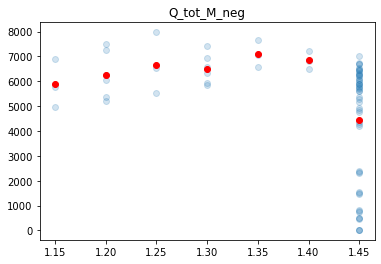

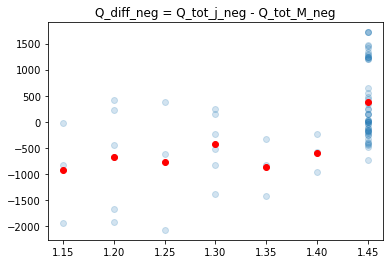

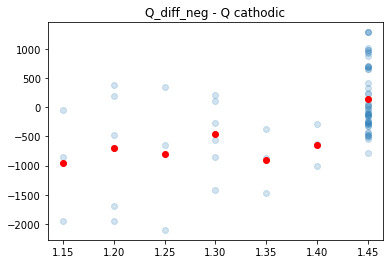

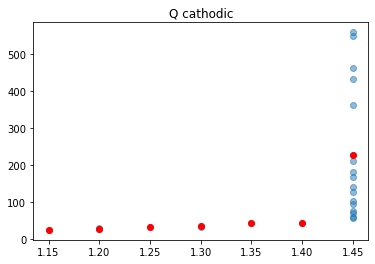

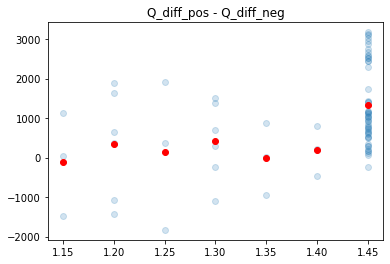

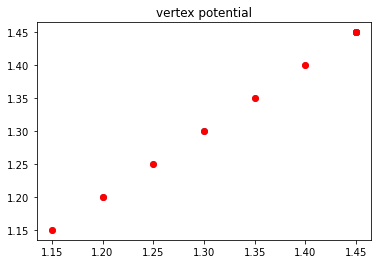

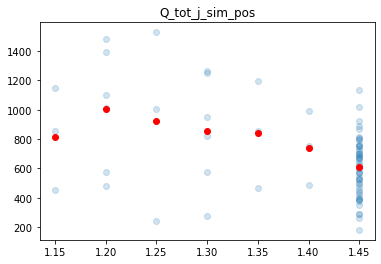

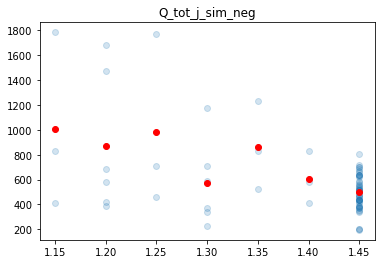

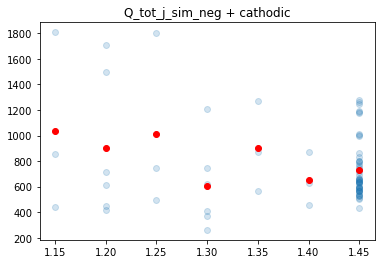

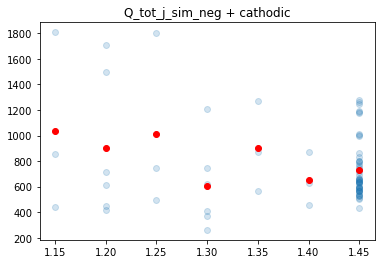

In [215]:
statistics2_K.plot_short('all')

In [158]:
n=0
for overview_ in statistics_K.overviews:
    print(n, ': interval= ', overview_.interval,  ', K modifier =  ' , overview_.K_modifier)
    n += 1

0 : interval=  0 , K modifier =   0
1 : interval=  0 , K modifier =   0.0025
2 : interval=  0 , K modifier =   0.005


### charge pos and neg

In [329]:
statistics2_K.overviews[0].df['cycle'].to_list()
len(statistics2_K.overviews[0].cycles())

25

Text(0.5, 1.0, 'Q_tot_j_sim_pos')

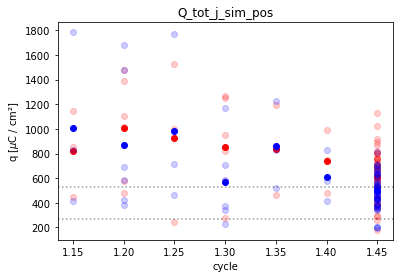

In [326]:
index = 'Q_tot_j_sim_pos'
index2 = 'Q_tot_j_sim_neg'
xaxis = statistics2_K.overviews[0].df['cycle'].to_list()#'cycle' # 'vertex potential'
xaxis = 'vertex potential'
statistics = statistics2_K
fig, ax = plt.subplots(1,1)

ax.axhline(265, alpha=0.4, linestyle=':', color='k') # 2 e transferred
ax.axhline(530, alpha=0.4, linestyle=':', color='k') # 2 e transferred

#self.df_short.plot.scatter('vertex potential', 'Q_tot_j')
ax.scatter(statistics.df[xaxis], statistics.df[index], alpha=0.2, color='red')
ax.scatter(statistics.df_short[xaxis], statistics.df_short[index], color='red')


ax.scatter(statistics.df[xaxis], statistics.df[index2], alpha=0.2, color='blue')
ax.scatter(statistics.df_short[xaxis], statistics.df_short[index2], color='blue')
ax.set_ylabel(r'q [$\mu$C / cm²]')
ax.set_xlabel('cycle')
#ax.set_ylim(0,800)

ax.set_title(index)

timeshift:  0
K_modifier:  0


<AxesSubplot:xlabel='potential'>

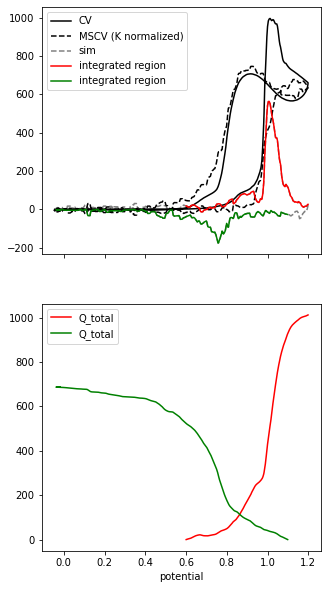

In [229]:
import matplotlib.pyplot as plt
cycle = 12
overview_nbr = 1
overviewK2 = statistics2_K.overviews[overview_nbr]
current1 = 'current1_muA_geo'
current2 = 'sim_current'
current3 = 'current_H_sub' #'sim_current'
integration = 'Q_tot_j_sim_pos'
integration2 = 'Q_tot_j_sim_neg'

print('timeshift: ', overviewK2.interval)
print('K_modifier: ', overviewK2.K_modifier)

fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
overviewK2.charges[cycle].df.plot('potential',current1, ax=ax, color='k', label='CV')
overviewK2.charges[cycle].df.plot('potential',current2, ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
overviewK2.charges[cycle].df.plot('potential',current3, ax=ax, color='k', linestyle='--', label='sim', alpha=0.5)
#overview_3.charges[119].charge_total_j['df'].plot('potential','current1_muA_geo', ax=ax, color='r', label='integrated region')
overviewK2.charges[cycle].charges[integration]['df'].plot('potential', overviewK2.charges[cycle].charges[integration]['axis'], ax=ax, color='r', label='integrated region')
overviewK2.charges[cycle].charges[integration2]['df'].plot('potential', overviewK2.charges[cycle].charges[integration2]['axis'], ax=ax, color='g', label='integrated region')
overviewK2.charges[cycle].charges[integration]['df'].plot('potential', 'Q_total', ax=ax1, color='r')
overviewK2.charges[cycle].charges[integration2]['df'].plot('potential', 'Q_total', ax=ax1, color='g')

### determine quality of scans with different errors

<AxesSubplot:xlabel='potential'>

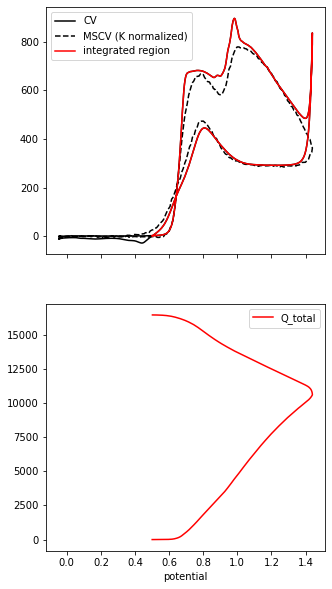

In [129]:
n = 0
cycle =25

overview__ = statistics_K.overviews[n]
fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
overview__.charges[cycle].df.plot('potential','current1_muA_geo', ax=ax, color='k', label='CV')
overview__.charges[cycle].df.plot('potential','sim_current', ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')

overview__.charges[cycle].charges['Q_tot_j']['df'].plot('potential', overview_3.charges[119].charges['Q_tot_j']['axis'], ax=ax, color='r', label='integrated region')
overview__.charges[cycle].charges['Q_tot_j']['df'].plot('potential', 'Q_total', ax=ax1, color='r')


# Demonstration Charge evaluation

Show the region which is integrated.

In [ ]:
fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
overview_3.charges[119].df.plot('potential','current1_muA_geo', ax=ax, color='k', label='CV')
overview_3.charges[119].df.plot('potential','sim_current', ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
#overview_3.charges[119].charge_total_j['df'].plot('potential','current1_muA_geo', ax=ax, color='r', label='integrated region')
overview_3.charges[119].charges['Q_tot_j']['df'].plot('potential', overview_3.charges[119].charges['Q_tot_j']['axis'], ax=ax, color='r', label='integrated region')
overview_3.charges[119].charges['Q_tot_j']['df'].plot('potential', 'Q_total', ax=ax1, color='r')

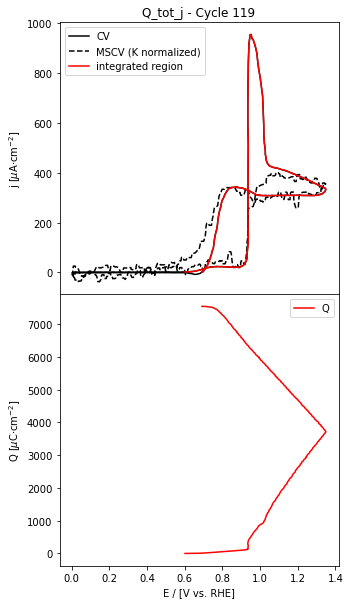

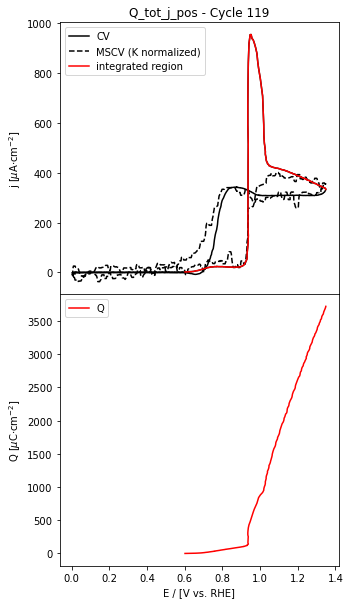

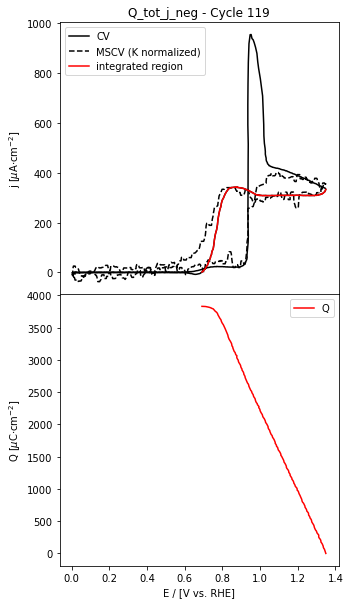

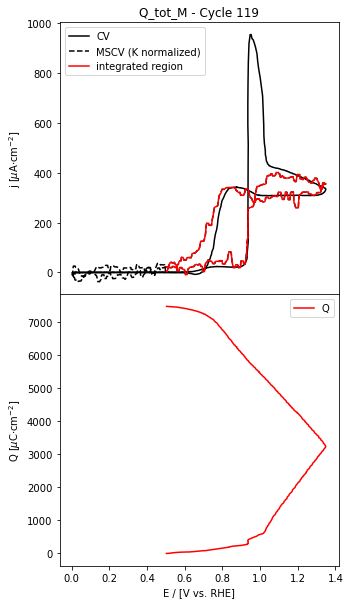

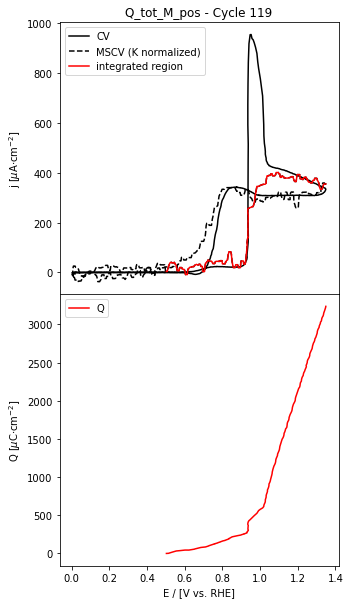

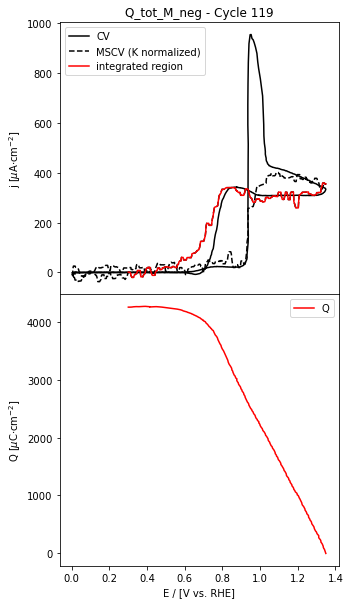

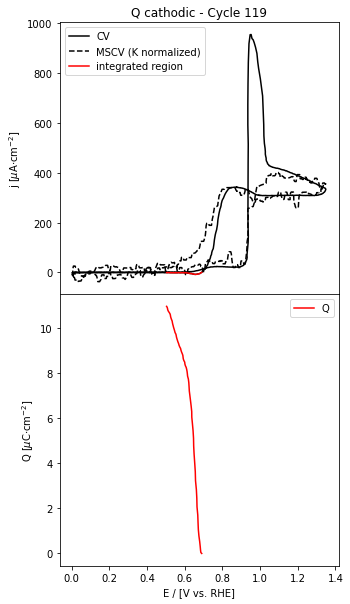

In [169]:
save = True
cycle = 119
for key in list(overview_3.charges[cycle].charges.keys()):
    axis = overview_3.charges[cycle].charges[key]['axis']
    
    fig, [ax, ax1] = plt.subplots(2,1, figsize=[5,10], sharex=True)
    overview_3.charges[cycle].df.plot('potential', 'current1_muA_geo', ax=ax, color='k', label='CV')
    overview_3.charges[cycle].df.plot('potential','sim_current', ax=ax, color='k', linestyle='--', label='MSCV (K normalized)')
    overview_3.charges[cycle].charges[key]['df'].plot('potential', axis, ax=ax, color='r', label='integrated region')
    overview_3.charges[cycle].charges[key]['df'].plot('potential', 'Q_total', ax=ax1, color='r', label='Q')
    ax.set_title(f'{key} - Cycle {cycle}')
    ax.set_ylabel(r'j [$\mu$A$\cdot$cm$^{-2}$]')
    ax1.set_ylabel(r'Q [$\mu$C$\cdot$cm$^{-2}$]')
    ax.set_xlabel('E / [V vs. RHE]')
    ax1.set_xlabel('E / [V vs. RHE]')
    # ax1.set_title('Charge evolution')
    plt.subplots_adjust(hspace=0)
    if save:
        plt.savefig(f'../evaluation/ChargeEvaluation/demonstration/{key}.png', dpi=400)

# Comparison

In [336]:
def cm_to_inch(cm):
    from astropy import units as u
    return (cm * u.cm).to(u.imperial.inch).value
cm_to_inch(1)

0.39370078740157477

In [232]:
# overview_1.cycle_description
c_info_1 = {}
for cycle in overview_1.cycles():
    c_info_1[cycle] = {'UPL' : overview_1.cycle_description[cycle]['vertex potential']}
c_info_1

{107: {'UPL': 1.0471780000000002},
 108: {'UPL': 1.04735},
 109: {'UPL': 1.045054666666664},
 110: {'UPL': 1.0977603999999954},
 111: {'UPL': 1.0971909523809529},
 112: {'UPL': 1.1466794062500183},
 113: {'UPL': 1.1474359999999906},
 114: {'UPL': 1.1972739999999955},
 115: {'UPL': 1.1985176451612811},
 116: {'UPL': 1.248138749999998},
 117: {'UPL': 1.2480842903225795},
 118: {'UPL': 1.2989537999999936},
 119: {'UPL': 1.298400781250003},
 120: {'UPL': 1.346402}}

In [233]:
c_info_3 = {}
for cycle in overview_3.cycles():
    c_info_3[cycle] = {'UPL' : overview_3.cycle_description[cycle]['vertex potential']}
c_info_3

{107: {'UPL': 1.048555},
 108: {'UPL': 1.0989893636363508},
 109: {'UPL': 1.0985157812500104},
 110: {'UPL': 1.1476434615384634},
 111: {'UPL': 1.1484725000000058},
 112: {'UPL': 1.1973543846153831},
 113: {'UPL': 1.2001889692307806},
 114: {'UPL': 1.249265014925366},
 115: {'UPL': 1.2450853939394009},
 116: {'UPL': 1.2975414000000027},
 117: {'UPL': 1.298280298507466},
 118: {'UPL': 1.34641022727273},
 119: {'UPL': 1.3488129999999998}}

## 3.5 ML: Compare low and high UPL

Text(0.5, 1.0, '3.5 ML Pt')

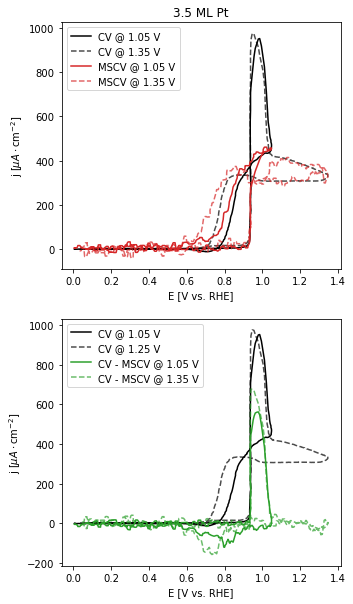

In [234]:
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
blue = u'#1f77b4'
green = u'#2ca02c'
red = u'#d62728'

cv_color = 'k' #blue
ms_color = red
sim_color = green
import matplotlib.pyplot as plt
fig, [ax0, ax1] = plt.subplots(2,1, figsize=[5,10])
# overview_3.df.plot('potential', 'current1_muA_geo', ax=ax0)
overview_3.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
overview_3.charges[118].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.7)
overview_3.charges[107].df.plot('potential', 'sim_current', ax=ax0, color=ms_color, label='MSCV @ 1.05 V')
overview_3.charges[118].df.plot('potential', 'sim_current', ax=ax0, color=ms_color, linestyle='--', label='MSCV @ 1.35 V', alpha=0.7)
overview_3.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, label='CV @ 1.05 V')
overview_3.charges[118].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, linestyle='--', label='CV @ 1.25 V', alpha=0.7)
overview_3.charges[107].df.plot('potential', 'current_H_sub', ax=ax1, color=sim_color, label='CV - MSCV @ 1.05 V')
overview_3.charges[118].df.plot('potential', 'current_H_sub', ax=ax1, color=sim_color, linestyle='--', label='CV - MSCV @ 1.35 V', alpha=0.7)
ax0.set_xlabel('E [V vs. RHE]')
ax1.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax1.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax0.set_title('3.5 ML Pt')

### Figure - All cycles

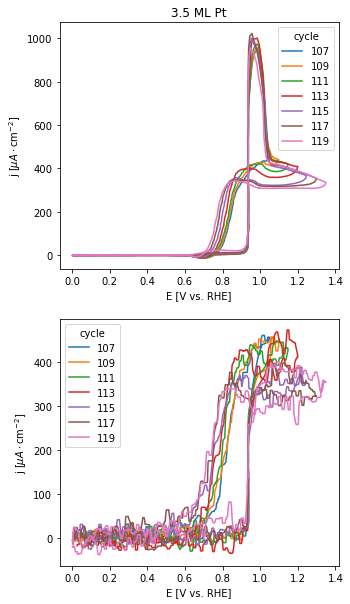

In [235]:
import matplotlib.pyplot as plt
fig, [ax0, ax1] = plt.subplots(2,1, figsize=[5,10])

# for cycle in overview_3.cycles()[9:]:
for cycle in range(107,120,2): # every second cycle
    overview_3.charges[cycle].df.plot('potential', 'current1_muA_geo', ax=ax0, label=cycle)#legend=False)
    overview_3.charges[cycle].df.plot('potential', 'sim_current', ax=ax1, label=cycle)#legend=False)

ax0.set_xlabel('E [V vs. RHE]')
ax1.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax1.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax0.set_title('3.5 ML Pt')
ax0.legend(title='cycle')
ax1.legend(title='cycle')

Text(0, 0.5, 'Q / uC cm-2')

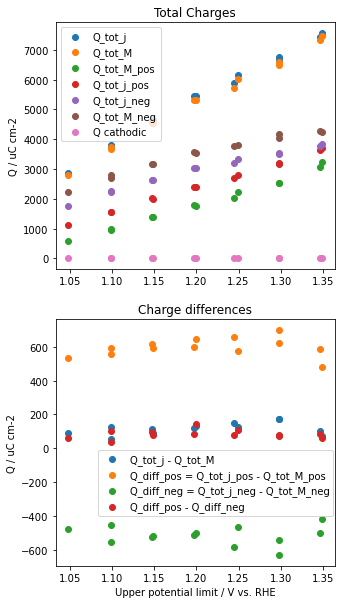

In [236]:
import matplotlib.pyplot as plt
df = overview_3.df

y = [
    "Q_tot_j",
    "Q_tot_M",
    "Q_tot_M_pos",
    "Q_tot_j_pos",
    "Q_tot_j_neg",
    "Q_tot_M_neg",
    "Q cathodic",
]
y1 = [
    "Q_tot_j - Q_tot_M",
    "Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos",
    "Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg",
    "Q_diff_pos - Q_diff_neg",
]

y2 = [
    "Q_tot_j - Q_tot_M",
    # "diff_pos = j_pos and M_pos",
    # "Q cathodic",
    "Q_diff_pos - Q_diff_neg",
    # "diff_neg = j_neg and M_neg",
]


fig, [ax0, ax1] = plt.subplots(2, 1, figsize=[5, 10])
for i in y:
    #     df.plot.scatter(x='vertex potential', y=i, ax=ax0)
    ax0.scatter(x=df["vertex potential"], y=df[i], label=i)

for i in y1:
    ax1.scatter(x=df["vertex potential"], y=df[i], label=i)
    
# for i in y2:
#     ax2.scatter(x=df["vertex potential"], y=df[i], label=i)
    
ax0.legend()
ax0.set_title('Total Charges')
ax1.legend(loc=[0.15, 0.2])
ax1.set_title('Charge differences')
# ax2.legend()
ax1.set_xlabel("Upper potential limit / V vs. RHE")
ax0.set_ylabel("Q / uC cm-2")
ax1.set_ylabel("Q / uC cm-2")

### Charge of the cathodic peak

<AxesSubplot:xlabel='vertex potential', ylabel='Q cathodic'>

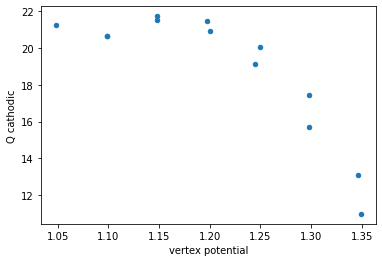

In [237]:
overview_3.df.plot.scatter('vertex potential', 'Q cathodic')

## 1 ML: Compare low and high UPL

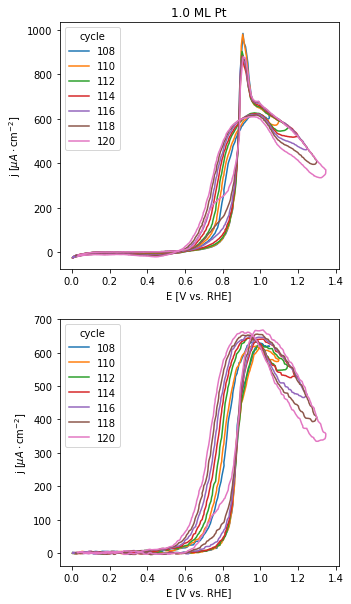

In [176]:
import matplotlib.pyplot as plt
fig, [ax0, ax1] = plt.subplots(2,1, figsize=[5,10])

# for cycle in overview_3.cycles()[9:]:
for cycle in range(108,121,2): # every second cycle
    overview_1.charges[cycle].df.plot('potential', 'current1_muA_geo', ax=ax0, label=cycle)#legend=False)
    overview_1.charges[cycle].df.plot('potential', 'sim_current', ax=ax1, label=cycle)#legend=False)

ax0.set_xlabel('E [V vs. RHE]')
ax1.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax1.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax0.set_title('1.0 ML Pt')
ax0.legend(title='cycle')
ax1.legend(title='cycle')

Text(0.5, 1.0, '1.0 ML Pt')

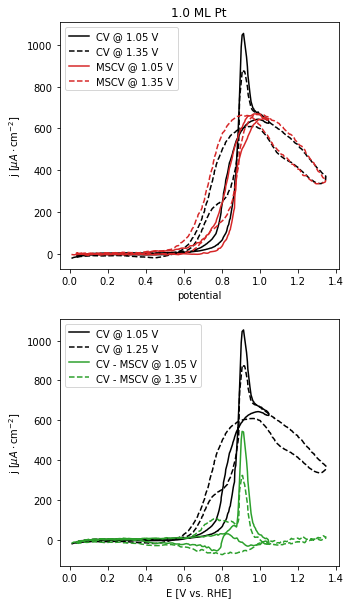

In [177]:
import matplotlib.pyplot as plt
fig, [ax0, ax1] = plt.subplots(2,1, figsize=[5,10])
# overview_3.df.plot('potential', 'current1_muA_geo', ax=ax0)
overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V')
overview_1.charges[107].df.plot('potential', 'sim_current', ax=ax0, color=ms_color, label='MSCV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'sim_current', ax=ax0, color=ms_color, linestyle='--', label='MSCV @ 1.35 V')
overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, label='CV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, linestyle='--', label='CV @ 1.25 V')
overview_1.charges[107].df.plot('potential', 'current_H_sub', ax=ax1, color=sim_color, label='CV - MSCV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'current_H_sub', ax=ax1, color=sim_color, linestyle='--', label='CV - MSCV @ 1.35 V')
ax1.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax1.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax0.set_title('1.0 ML Pt')

Text(0, 0.5, 'Q / uC cm-2')

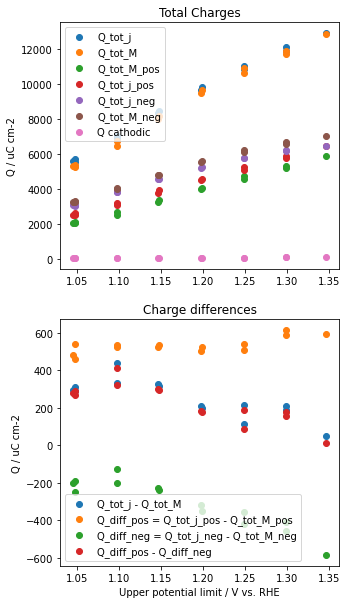

In [183]:
import matplotlib.pyplot as plt
df = overview_1.df

y = [
    "Q_tot_j",
    "Q_tot_M",
    "Q_tot_M_pos",
    "Q_tot_j_pos",
    "Q_tot_j_neg",
    "Q_tot_M_neg",
    "Q cathodic",
]
y1 = [
    "Q_tot_j - Q_tot_M",
    "Q_diff_pos = Q_tot_j_pos - Q_tot_M_pos",
    "Q_diff_neg = Q_tot_j_neg - Q_tot_M_neg",
    "Q_diff_pos - Q_diff_neg",
]

y2 = [
    "Q_tot_j - Q_tot_M",
    # "diff_pos = j_pos and M_pos",
    # "Q cathodic",
    "Q_diff_pos - Q_diff_neg",
    # "diff_neg = j_neg and M_neg",
]

fig, [ax0, ax1] = plt.subplots(2, 1, figsize=[5, 10])
for i in y:
    #     df.plot.scatter(x='vertex potential', y=i, ax=ax0)
    ax0.scatter(x=df["vertex potential"], y=df[i], label=i)

for i in y1:
    ax1.scatter(x=df["vertex potential"], y=df[i], label=i)
    
# for i in y2:
#     ax2.scatter(x=df["vertex potential"], y=df[i], label=i)
    
ax0.legend()
ax0.set_title('Total Charges')
ax1.legend(loc='lower left')#loc=[0.15, 0.2])
ax1.set_title('Charge differences')
#ax2.legend()
ax1.set_xlabel("Upper potential limit / V vs. RHE")
ax0.set_ylabel("Q / uC cm-2")
ax1.set_ylabel("Q / uC cm-2")

### Charge of the cathodic peak

<AxesSubplot:xlabel='vertex potential', ylabel='Q cathodic'>

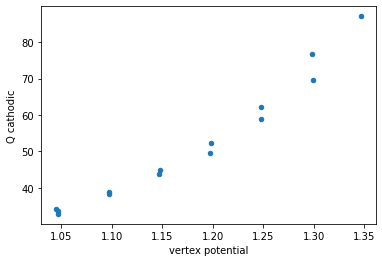

In [27]:
overview_1.df.plot.scatter('vertex potential', 'Q cathodic')

In [61]:
300/256

1.171875

# All coverages

In [ ]:
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
blue = u'#1f77b4'
green = u'#2ca02c'
red = u'#d62728'

def figure2(overview, lpl, upl, title=None, save=False):
    cv_color = 'k' #blue
    ms_color = red
    sim_color = green
    import matplotlib.pyplot as plt
    
    def cm_to_inch(cm):
        from astropy import units as u
        return (cm * u.cm).to(u.imperial.inch).value
    
    fig, axis = plt.subplots(4,1, figsize=[5,12], sharex=True)
    # fig, axis = plt.subplots(4,1, figsize=[cm_to_inch(7),cm_to_inch(20)], sharex=True)
    ax0, ax1, ax2, ax3 = axis
    
    overview.charges[upl].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.5)

    # overview.charges[upl].df.plot('potential', 'ion_current_M44_UVS_ALS_sub_norm_filt', ax=ax1, color=ms_color, label='MSCV @ 1.05 V')
    # overview.charges[lpl].df.plot('potential', 'ion_current_M44_UVS_ALS_sub_norm_filt', ax=ax1, color=ms_color, linestyle='--', label='MSCV @ 1.35 V', alpha=0.5)
    overview.charges[upl].df.plot('potential', 'sim_current', ax=ax1, color=ms_color, label='MSCV K norm @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'sim_current', ax=ax1, color=ms_color, linestyle='--', label='MSCV k norm @ 1.35 V', alpha=0.5)

    
    overview.charges[upl].df.plot('potential', 'current1_muA_geo', ax=ax2, color=cv_color, label='CV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current1_muA_geo', ax=ax2, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.5)
    overview.charges[upl].df.plot('potential', 'sim_current', ax=ax2, color=ms_color, label='MSCV K norm @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'sim_current', ax=ax2, color=ms_color, linestyle='--', label='MSCV k norm @ 1.35 V', alpha=0.5)

    overview.charges[upl].df.plot('potential', 'current1_muA_geo', ax=ax3, color=cv_color, label='CV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current1_muA_geo', ax=ax3, color=cv_color, linestyle='--', label='CV @ 1.25 V', alpha=0.5)
    overview.charges[upl].df.plot('potential', 'current_H_sub', ax=ax3, color=sim_color, label='CV - MSCV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current_H_sub', ax=ax3, color=sim_color, linestyle='--', label='CV - MSCV @ 1.35 V', alpha=0.5)
    
    ax3.set_xlabel('E [V vs. RHE]')
    ax1.set_ylabel(r'j [nA]')
    
    if title:
        ax0.set_title(title)
    
    plt.subplots_adjust(hspace=0, left=0.15, top=0.97, bottom=0.04)
        
    # for ax in axis:
    #     ax.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
    
    for ax in [ax0, ax1, ax2]:
        ax.tick_params(labelbottom=False)
    #for ax in [ax0, ax2, ax3]:
    for ax in axis:
        ax.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
        ax.set_ylim(-250, 1150)
        ax.set_xlim(-0.05, 1.45)
        
    if save:
        plt.savefig(f"./../Figures/article_engs2022/figure2/fig2_{title.replace(' ', '_')}.png", dpi=400, facecolor='white')

save = True
figure2(overview_1,107, 120, title='1.0 ML Pt', save=save)
figure2(overview_2,11, 17, title='2.0 ML Pt', save=save)
figure2(overview_3,107, 119, title='3.5 ML Pt', save=save)

### Figure 2 Article - MSCV, CV, sim CV

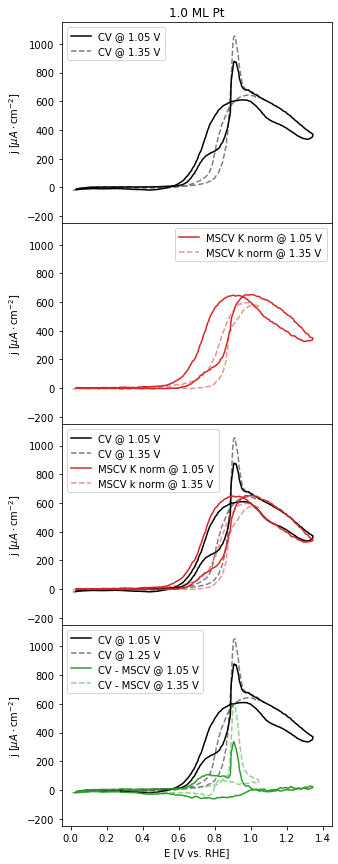

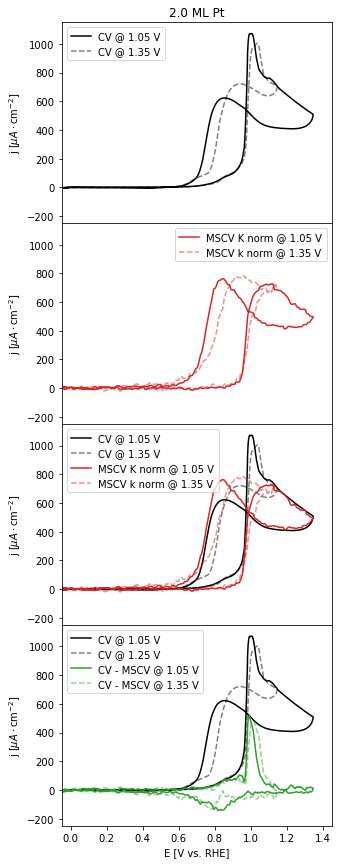

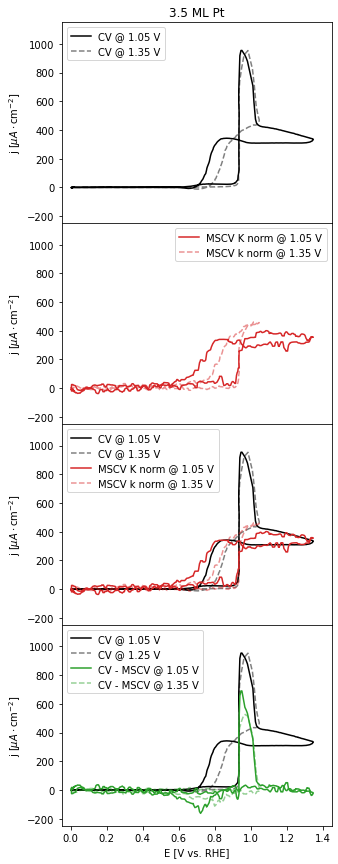

In [258]:
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
blue = u'#1f77b4'
green = u'#2ca02c'
red = u'#d62728'

def figure2(overview, lpl, upl, title=None, save=False):
    cv_color = 'k' #blue
    ms_color = red
    sim_color = green
    import matplotlib.pyplot as plt
    
    def cm_to_inch(cm):
        from astropy import units as u
        return (cm * u.cm).to(u.imperial.inch).value
    
    fig, axis = plt.subplots(4,1, figsize=[5,12], sharex=True)
    # fig, axis = plt.subplots(4,1, figsize=[cm_to_inch(7),cm_to_inch(20)], sharex=True)
    ax0, ax1, ax2, ax3 = axis
    
    overview.charges[upl].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.5)

    # overview.charges[upl].df.plot('potential', 'ion_current_M44_UVS_ALS_sub_norm_filt', ax=ax1, color=ms_color, label='MSCV @ 1.05 V')
    # overview.charges[lpl].df.plot('potential', 'ion_current_M44_UVS_ALS_sub_norm_filt', ax=ax1, color=ms_color, linestyle='--', label='MSCV @ 1.35 V', alpha=0.5)
    overview.charges[upl].df.plot('potential', 'sim_current', ax=ax1, color=ms_color, label='MSCV K norm @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'sim_current', ax=ax1, color=ms_color, linestyle='--', label='MSCV k norm @ 1.35 V', alpha=0.5)

    
    overview.charges[upl].df.plot('potential', 'current1_muA_geo', ax=ax2, color=cv_color, label='CV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current1_muA_geo', ax=ax2, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.5)
    overview.charges[upl].df.plot('potential', 'sim_current', ax=ax2, color=ms_color, label='MSCV K norm @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'sim_current', ax=ax2, color=ms_color, linestyle='--', label='MSCV k norm @ 1.35 V', alpha=0.5)

    overview.charges[upl].df.plot('potential', 'current1_muA_geo', ax=ax3, color=cv_color, label='CV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current1_muA_geo', ax=ax3, color=cv_color, linestyle='--', label='CV @ 1.25 V', alpha=0.5)
    overview.charges[upl].df.plot('potential', 'current_H_sub', ax=ax3, color=sim_color, label='CV - MSCV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current_H_sub', ax=ax3, color=sim_color, linestyle='--', label='CV - MSCV @ 1.35 V', alpha=0.5)
    
    ax3.set_xlabel('E [V vs. RHE]')
    ax1.set_ylabel(r'j [nA]')
    
    if title:
        ax0.set_title(title)
    
    plt.subplots_adjust(hspace=0, left=0.15, top=0.97, bottom=0.04)
        
    # for ax in axis:
    #     ax.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
    
    for ax in [ax0, ax1, ax2]:
        ax.tick_params(labelbottom=False)
    #for ax in [ax0, ax2, ax3]:
    for ax in axis:
        ax.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
        ax.set_ylim(-250, 1150)
        ax.set_xlim(-0.05, 1.45)
        
    if save:
        plt.savefig(f"./../Figures/article_engs2022/figure2/fig2_{title.replace(' ', '_')}.png", dpi=400, facecolor='white')

save = True
figure2(overview_1,107, 120, title='1.0 ML Pt', save=save)
figure2(overview_2,11, 17, title='2.0 ML Pt', save=save)
figure2(overview_3,107, 119, title='3.5 ML Pt', save=save)

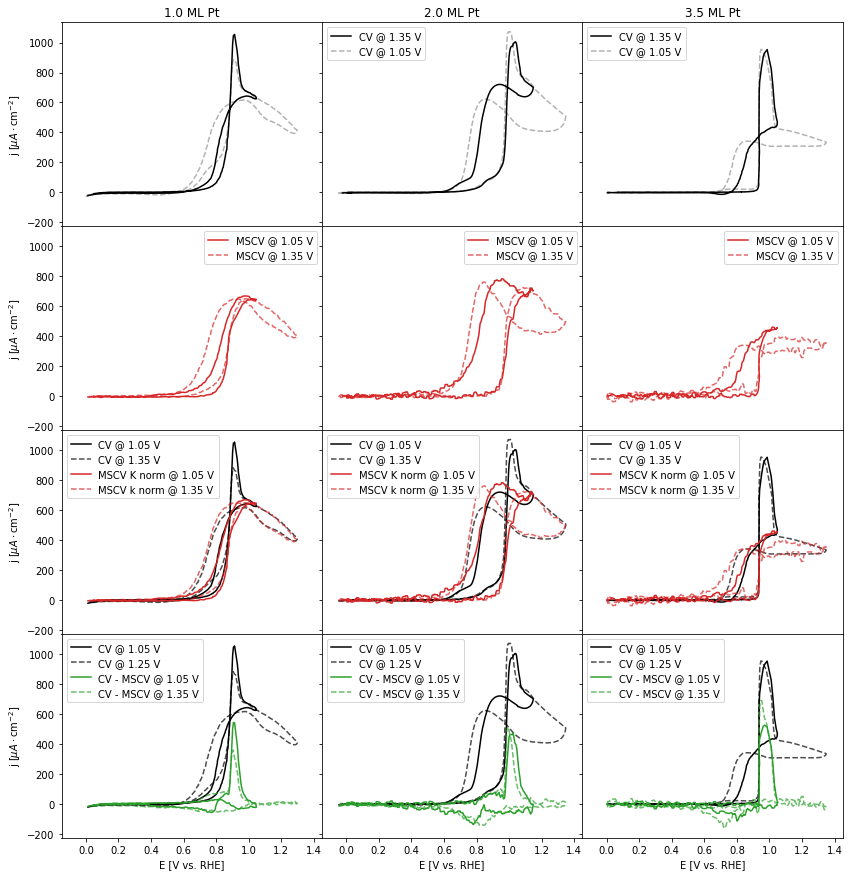

In [286]:
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
blue = u'#1f77b4'
green = u'#2ca02c'
red = u'#d62728'

def figure2(overview):
    cv_color = 'k' #blue
    ms_color = red
    sim_color = green
    import matplotlib.pyplot as plt
    fig, axis = plt.subplots(4,3, figsize=[14,15], sharey=True, sharex=True)
    [ax00, ax01, ax02], [ax10, ax11, ax12], [ax20, ax21, ax22], [ax30, ax31, ax32] = axis

    # FIRST ROW - CV
    # 1-ML
    overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax00, color=cv_color, label='CV @ 1.05 V')
    overview_1.charges[119].df.plot('potential', 'current1_muA_geo', ax=ax00, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.3)
    # 2-ML
    overview_2.charges[11].df.plot('potential', 'current1_muA_geo', ax=ax01, color=cv_color, label='CV @ 1.35 V')
    overview_2.charges[17].df.plot('potential', 'current1_muA_geo', ax=ax01, color=cv_color, linestyle='--', label='CV @ 1.05 V', alpha=0.3, sharey=ax00)
    # 3.5-ML
    overview_3.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax02, color=cv_color, label='CV @ 1.35 V')
    overview_3.charges[119].df.plot('potential', 'current1_muA_geo', ax=ax02, color=cv_color, linestyle='--', label='CV @ 1.05 V', alpha=0.3, sharey=ax00)
    
    
    # SECOND ROW - MSCV
    # Choose how you would like to plot the DEMS signal (raw or modified by K to yield a current)
    # change the axis label accordingly
    # ion_current = 'ion_current_M44_UVS_ALS_sub_norm_filt' # raw DEMS current
    ion_current = 'sim_current' # simluated current from raw DEMS current
    # 1-ML
    overview_1.charges[107].df.plot('potential', ion_current, ax=ax10, color=ms_color, label='MSCV @ 1.05 V')
    overview_1.charges[118].df.plot('potential', ion_current, ax=ax10, color=ms_color, linestyle='--', label='MSCV @ 1.35 V', alpha=0.7)
    # 2-ML
    overview_2.charges[11].df.plot('potential', ion_current, ax=ax11, color=ms_color, label='MSCV @ 1.05 V')
    overview_2.charges[17].df.plot('potential', ion_current, ax=ax11, color=ms_color, linestyle='--', label='MSCV @ 1.35 V', alpha=0.7)
    # 3-ML
    overview_3.charges[107].df.plot('potential', ion_current, ax=ax12, color=ms_color, label='MSCV @ 1.05 V')
    overview_3.charges[119].df.plot('potential', ion_current, ax=ax12, color=ms_color, linestyle='--', label='MSCV @ 1.35 V', alpha=0.7)
    
    
    # Third ROW - CV vs. MSCV
    # 1-ML
    overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax20, color=cv_color, label='CV @ 1.05 V')
    overview_1.charges[118].df.plot('potential', 'current1_muA_geo', ax=ax20, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.7)
    overview_1.charges[107].df.plot('potential', 'sim_current', ax=ax20, color=ms_color, label='MSCV K norm @ 1.05 V')
    overview_1.charges[118].df.plot('potential', 'sim_current', ax=ax20, color=ms_color, linestyle='--', label='MSCV k norm @ 1.35 V', alpha=0.7)
    # 2-ML
    overview_2.charges[11].df.plot('potential', 'current1_muA_geo', ax=ax21, color=cv_color, label='CV @ 1.05 V')
    overview_2.charges[17].df.plot('potential', 'current1_muA_geo', ax=ax21, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.7)
    overview_2.charges[11].df.plot('potential', 'sim_current', ax=ax21, color=ms_color, label='MSCV K norm @ 1.05 V')
    overview_2.charges[17].df.plot('potential', 'sim_current', ax=ax21, color=ms_color, linestyle='--', label='MSCV k norm @ 1.35 V', alpha=0.7)
    # 3-ML
    overview_3.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax22, color=cv_color, label='CV @ 1.05 V')
    overview_3.charges[119].df.plot('potential', 'current1_muA_geo', ax=ax22, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.7)
    overview_3.charges[107].df.plot('potential', 'sim_current', ax=ax22, color=ms_color, label='MSCV K norm @ 1.05 V')
    overview_3.charges[119].df.plot('potential', 'sim_current', ax=ax22, color=ms_color, linestyle='--', label='MSCV k norm @ 1.35 V', alpha=0.7)
    
    
    # FOURTH ROW - CV vs. SIMULATED CV
    # 1-ML
    overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax30, color=cv_color, label='CV @ 1.05 V')
    overview_1.charges[118].df.plot('potential', 'current1_muA_geo', ax=ax30, color=cv_color, linestyle='--', label='CV @ 1.25 V', alpha=0.7)
    overview_1.charges[107].df.plot('potential', 'current_H_sub', ax=ax30, color=sim_color, label='CV - MSCV @ 1.05 V')
    overview_1.charges[118].df.plot('potential', 'current_H_sub', ax=ax30, color=sim_color, linestyle='--', label='CV - MSCV @ 1.35 V', alpha=0.7)
    # 2-ML
    overview_2.charges[11].df.plot('potential', 'current1_muA_geo', ax=ax31, color=cv_color, label='CV @ 1.05 V')
    overview_2.charges[17].df.plot('potential', 'current1_muA_geo', ax=ax31, color=cv_color, linestyle='--', label='CV @ 1.25 V', alpha=0.7)
    overview_2.charges[11].df.plot('potential', 'current_H_sub', ax=ax31, color=sim_color, label='CV - MSCV @ 1.05 V')
    overview_2.charges[17].df.plot('potential', 'current_H_sub', ax=ax31, color=sim_color, linestyle='--', label='CV - MSCV @ 1.35 V', alpha=0.7)
    # 3-ML
    overview_3.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax32, color=cv_color, label='CV @ 1.05 V')
    overview_3.charges[119].df.plot('potential', 'current1_muA_geo', ax=ax32, color=cv_color, linestyle='--', label='CV @ 1.25 V', alpha=0.7)
    overview_3.charges[107].df.plot('potential', 'current_H_sub', ax=ax32, color=sim_color, label='CV - MSCV @ 1.05 V')
    overview_3.charges[119].df.plot('potential', 'current_H_sub', ax=ax32, color=sim_color, linestyle='--', label='CV - MSCV @ 1.35 V', alpha=0.7)
    
    
    # PLOT PROPERTIES
    for ax in [ax30, ax31, ax32]:
        ax.set_xlabel('E [V vs. RHE]')

    for ax in [ax00, ax10, ax20, ax30]:
        ax.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
    
    ax00.set_xlim(-0.15, 1.45)
    ax00.set_title('1.0 ML Pt')
    ax01.set_title('2.0 ML Pt')
    ax02.set_title('3.5 ML Pt')
    
    ax00.legend().set_visible(False)
    
    plt.subplots_adjust(wspace=0, hspace=0)
    
    plt.savefig(f"./../Figures/article_engs2022/fig_compare-1-2-3.png", dpi=400, facecolor='white')
    
figure2(overview_1)

# DPG Figures

In [348]:
# plt.rcParams.keys()

In [444]:
cv_color = 'k'
ms_color = 'blue'
msK_color = 'red'
redox_color = 'green'
sim_color = 'green'

cv_current = 'current1_muA_geo'
ms_current = 'xxx'
msK_current = 'sim_current'
redox_current = 'current_H_sub'


# which cycles

# overview_1, 107, 120, title='1.0 ML Pt'
# overview_2, 11, 17, title='2.0 ML Pt'
# overview_3, 107, 119, title='3.5 ML Pt'

# plot parameters
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.size'] = 10
#plt.axes.titlesize: 30

# whoch overview
overview_nbr = 1
overview35 = statistics_K.overviews[overview_nbr]

## structure - Activity - Stability

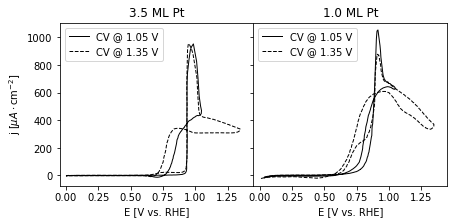

In [363]:
import matplotlib.pyplot as plt
fig, [ax0, ax1] = plt.subplots(1,2, figsize=[cm_to_inch(16),cm_to_inch(8)], sharex=True, sharey=True)

overview35.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
overview35.charges[119].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V')
# overview35.charges[107].df.plot('potential', 'sim_current', ax=ax0, color=msK_color, label='MSCV @ 1.05 V')
# overview_3.charges[120].df.plot('potential', 'sim_current', ax=ax0, color=msK_color, linestyle='--', label='MSCV @ 1.35 V')
overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, label='CV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, linestyle='--', label='CV @ 1.35 V')
# overview_1.charges[107].df.plot('potential', 'current_H_sub', ax=ax1, color=sim_color, label='CV - MSCV @ 1.05 V')
# overview_1.charges[120].df.plot('potential', 'current_H_sub', ax=ax1, color=sim_color, linestyle='--', label='CV - MSCV @ 1.35 V')

ax0.set_xlim(-0.05, 1.45)

ax0.set_xlabel('E [V vs. RHE]')
ax1.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
#ax1.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax0.set_title('3.5 ML Pt')
ax1.set_title('1.0 ML Pt')

plt.subplots_adjust(wspace=0, bottom=0.16, right=0.98)
plt.savefig('../Figures/DPG_2023/structure_activity_stability.png', dpi=300, facecolor='white')

## DEMS - Redox - ....

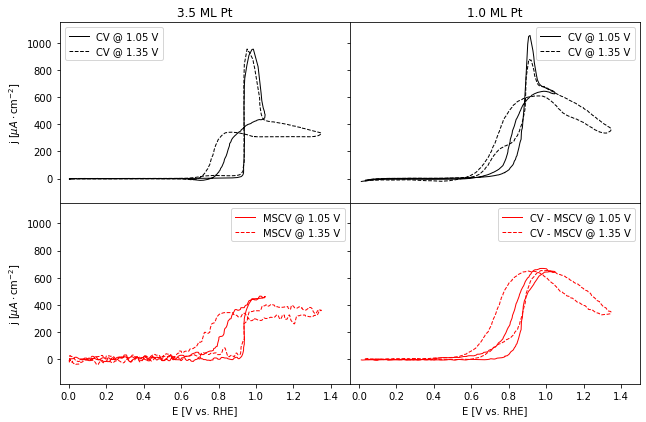

In [421]:
import matplotlib.pyplot as plt
fig, [[ax0, ax1],[ax2, ax3]] = plt.subplots(2,2, figsize=[cm_to_inch(23),cm_to_inch(15)], sharex=True, sharey=True)

overview35.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
overview35.charges[119].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V')
overview35.charges[107].df.plot('potential', 'sim_current', ax=ax2, color=msK_color, label='MSCV @ 1.05 V')
overview35.charges[119].df.plot('potential', 'sim_current', ax=ax2, color=msK_color, linestyle='--', label='MSCV @ 1.35 V')

overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, label='CV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, linestyle='--', label='CV @ 1.35 V')
overview_1.charges[107].df.plot('potential', 'sim_current', ax=ax3, color=msK_color, label='CV - MSCV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'sim_current', ax=ax3, color=msK_color, linestyle='--', label='CV - MSCV @ 1.35 V')

ax0.set_xlim(-0.05, 1.5)
ax0.set_ylim(-180, 1150)

ax2.set_xlabel('E [V vs. RHE]')
ax3.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax2.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax0.set_title('3.5 ML Pt')
ax1.set_title('1.0 ML Pt')

# ax0.axvline(0.93)
# ax1.axvline(0.87) onset for CO oxidation is lower on 1 ML Pt

plt.subplots_adjust(wspace=0, hspace=0, bottom=0.1, top=0.95, left=0.09, right=0.98)
plt.savefig('../Figures/DPG_2023/DEMS_redox_1.png', dpi=300, facecolor='white')

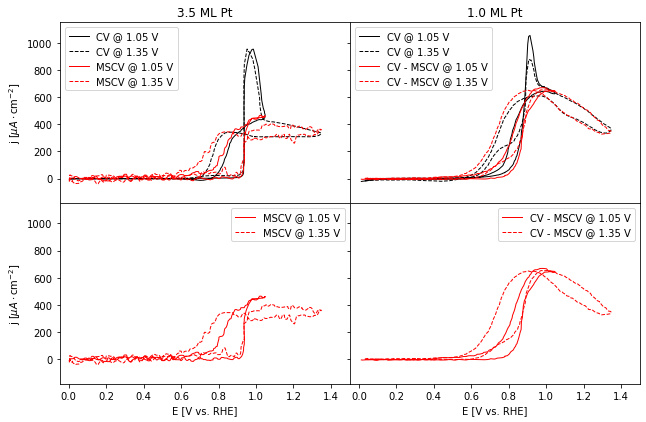

In [422]:
import matplotlib.pyplot as plt
fig, [[ax0, ax1],[ax2, ax3]] = plt.subplots(2,2, figsize=[cm_to_inch(23),cm_to_inch(15)], sharex=True, sharey=True)

overview35.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
overview35.charges[119].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V')
for ax in [ax0,ax2]:
    overview35.charges[107].df.plot('potential', 'sim_current', ax=ax, color=msK_color, label='MSCV @ 1.05 V')
    overview35.charges[119].df.plot('potential', 'sim_current', ax=ax, color=msK_color, linestyle='--', label='MSCV @ 1.35 V')
# overview35.charges[107].df.plot('potential', redox_current, ax=ax2, color=redox_color, label='CV @ 1.05 V')
# overview35.charges[119].df.plot('potential', redox_current, ax=ax2, color=redox_color, linestyle='--', label='CV @ 1.35 V')

    
overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, label='CV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, linestyle='--', label='CV @ 1.35 V')
for ax in [ax1, ax3]:
    overview_1.charges[107].df.plot('potential', 'sim_current', ax=ax, color=msK_color, label='CV - MSCV @ 1.05 V')
    overview_1.charges[120].df.plot('potential', 'sim_current', ax=ax, color=msK_color, linestyle='--', label='CV - MSCV @ 1.35 V')
# overview_1.charges[107].df.plot('potential', redox_current, ax=ax3, color=redox_color, label='CV @ 1.05 V')
# overview_1.charges[120].df.plot('potential', redox_current, ax=ax3, color=redox_color, linestyle='--', label='CV @ 1.35 V')

    
ax0.set_xlim(-0.05, 1.5)
ax0.set_ylim(-180, 1150)

ax2.set_xlabel('E [V vs. RHE]')
ax3.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax2.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax0.set_title('3.5 ML Pt')
ax1.set_title('1.0 ML Pt')

# ax0.axvline(0.93)
# ax1.axvline(0.87) onset for CO oxidation is lower on 1 ML Pt

plt.subplots_adjust(wspace=0, hspace=0, bottom=0.1, top=0.95, left=0.09, right=0.98)
plt.savefig('../Figures/DPG_2023/DEMS_redox_2.png', dpi=300, facecolor='white')

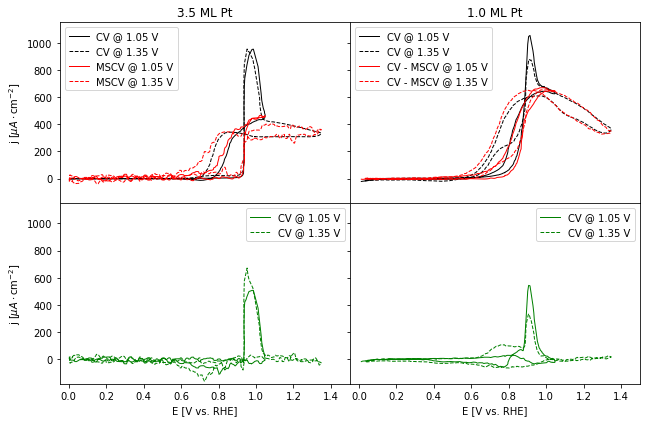

In [423]:
import matplotlib.pyplot as plt
fig, [[ax0, ax1],[ax2, ax3]] = plt.subplots(2,2, figsize=[cm_to_inch(23),cm_to_inch(15)], sharex=True, sharey=True)

overview35.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
overview35.charges[119].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V')
for ax in [ax0]:
    overview35.charges[107].df.plot('potential', 'sim_current', ax=ax, color=msK_color, label='MSCV @ 1.05 V')
    overview35.charges[119].df.plot('potential', 'sim_current', ax=ax, color=msK_color, linestyle='--', label='MSCV @ 1.35 V')
overview35.charges[107].df.plot('potential', redox_current, ax=ax2, color=redox_color, label='CV @ 1.05 V')
overview35.charges[119].df.plot('potential', redox_current, ax=ax2, color=redox_color, linestyle='--', label='CV @ 1.35 V')

    
overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, label='CV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, linestyle='--', label='CV @ 1.35 V')
for ax in [ax1]:
    overview_1.charges[107].df.plot('potential', 'sim_current', ax=ax, color=msK_color, label='CV - MSCV @ 1.05 V')
    overview_1.charges[120].df.plot('potential', 'sim_current', ax=ax, color=msK_color, linestyle='--', label='CV - MSCV @ 1.35 V')
overview_1.charges[107].df.plot('potential', redox_current, ax=ax3, color=redox_color, label='CV @ 1.05 V')
overview_1.charges[120].df.plot('potential', redox_current, ax=ax3, color=redox_color, linestyle='--', label='CV @ 1.35 V')

    
ax0.set_xlim(-0.05, 1.5)
ax0.set_ylim(-180, 1150)

ax2.set_xlabel('E [V vs. RHE]')
ax3.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax2.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax0.set_title('3.5 ML Pt')
ax1.set_title('1.0 ML Pt')

# ax0.axvline(0.93)
# ax1.axvline(0.87) onset for CO oxidation is lower on 1 ML Pt

plt.subplots_adjust(wspace=0, hspace=0, bottom=0.1, top=0.95, left=0.09, right=0.98)
plt.savefig('../Figures/DPG_2023/DEMS_redox_3.png', dpi=300, facecolor='white')

## Charge balance

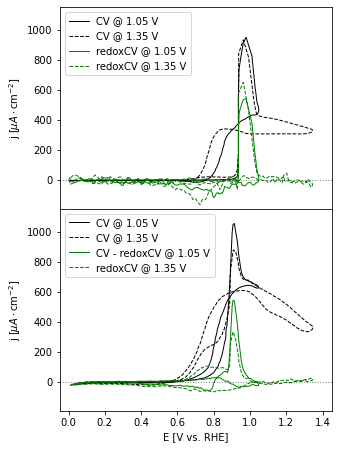

In [448]:
import matplotlib.pyplot as plt
fig, [ax0, ax1] = plt.subplots(2,1, figsize=[cm_to_inch(12),cm_to_inch(16)], sharex=True, sharey=True)
# overview_3.df.plot('potential', 'current1_muA_geo', ax=ax0)
overview35.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
overview35.charges[119].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V')
overview35.charges[107].df.plot('potential', 'current_H_sub', ax=ax0, color=redox_color, label='redoxCV @ 1.05 V')
overview35.charges[119].df.plot('potential', 'current_H_sub', ax=ax0, color=redox_color, linestyle='--', label='redoxCV @ 1.35 V')
overview_1.charges[107].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, label='CV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'current1_muA_geo', ax=ax1, color=cv_color, linestyle='--', label='CV @ 1.35 V')
overview_1.charges[107].df.plot('potential', 'current_H_sub', ax=ax1, color=sim_color, label='CV - redoxCV @ 1.05 V')
overview_1.charges[120].df.plot('potential', 'current_H_sub', ax=ax1, color=sim_color, linestyle='--', label='redoxCV @ 1.35 V')

ax0.set_xlim(-0.05, 1.45)
ax0.set_ylim(-190, 1150)
ax1.set_xlabel('E [V vs. RHE]')
ax0.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
ax1.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
#ax0.set_title('1.0 ML Pt')

for ax in [ax0, ax1]:
    ax.axhline(0, linestyle=':', color='k', alpha=0.5)

#ax0.set_xticklabels('')
plt.subplots_adjust(hspace=0, left=0.18, top=0.99, bottom=0.10, right=0.98)
plt.savefig('../Figures/DPG_2023/charge_balance.png', dpi=300, facecolor='white')

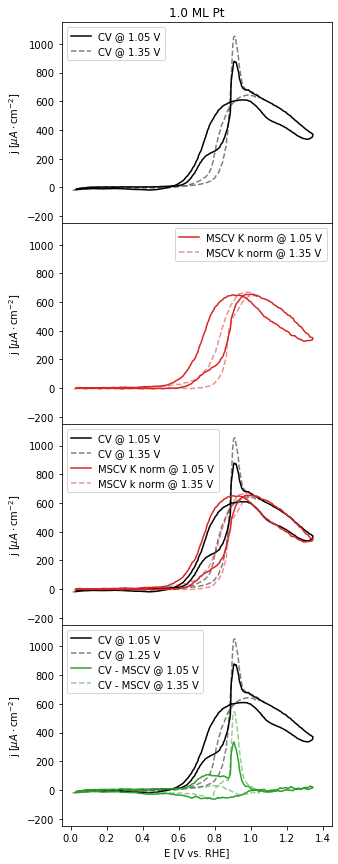

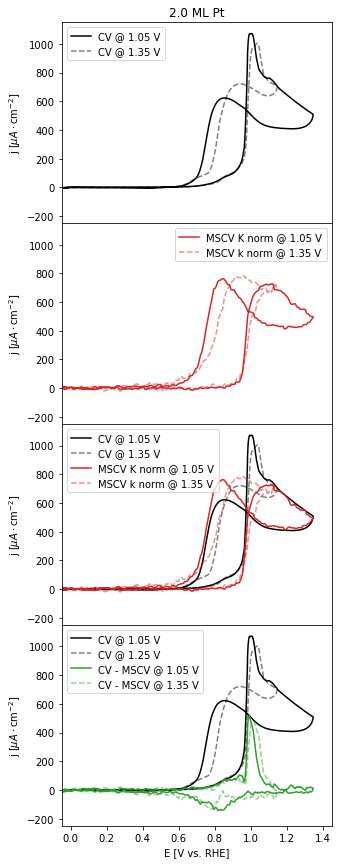

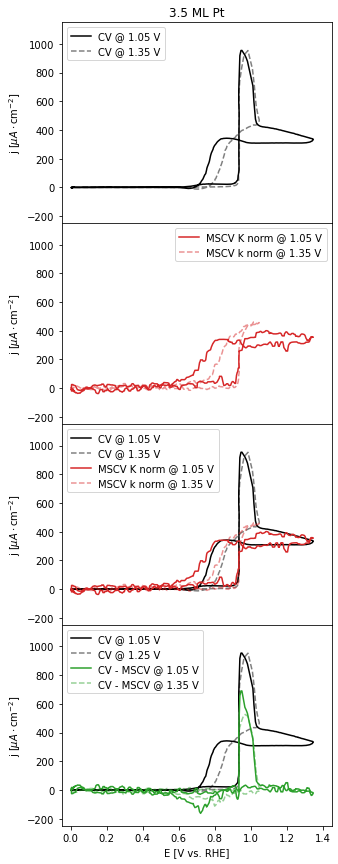

In [330]:
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
blue = u'#1f77b4'
green = u'#2ca02c'
red = u'#d62728'

def figure2(overview, lpl, upl, title=None, save=False):
    cv_color = 'k' #blue
    ms_color = red
    sim_color = green
    import matplotlib.pyplot as plt
    
    def cm_to_inch(cm):
        from astropy import units as u
        return (cm * u.cm).to(u.imperial.inch).value
    
    fig, axis = plt.subplots(4,1, figsize=[5,12], sharex=True)
    # fig, axis = plt.subplots(4,1, figsize=[cm_to_inch(7),cm_to_inch(20)], sharex=True)
    ax0, ax1, ax2, ax3 = axis
    
    overview.charges[upl].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, label='CV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current1_muA_geo', ax=ax0, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.5)

    # overview.charges[upl].df.plot('potential', 'ion_current_M44_UVS_ALS_sub_norm_filt', ax=ax1, color=ms_color, label='MSCV @ 1.05 V')
    # overview.charges[lpl].df.plot('potential', 'ion_current_M44_UVS_ALS_sub_norm_filt', ax=ax1, color=ms_color, linestyle='--', label='MSCV @ 1.35 V', alpha=0.5)
    overview.charges[upl].df.plot('potential', 'sim_current', ax=ax1, color=ms_color, label='MSCV K norm @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'sim_current', ax=ax1, color=ms_color, linestyle='--', label='MSCV k norm @ 1.35 V', alpha=0.5)

    
    overview.charges[upl].df.plot('potential', 'current1_muA_geo', ax=ax2, color=cv_color, label='CV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current1_muA_geo', ax=ax2, color=cv_color, linestyle='--', label='CV @ 1.35 V', alpha=0.5)
    overview.charges[upl].df.plot('potential', 'sim_current', ax=ax2, color=ms_color, label='MSCV K norm @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'sim_current', ax=ax2, color=ms_color, linestyle='--', label='MSCV k norm @ 1.35 V', alpha=0.5)

    overview.charges[upl].df.plot('potential', 'current1_muA_geo', ax=ax3, color=cv_color, label='CV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current1_muA_geo', ax=ax3, color=cv_color, linestyle='--', label='CV @ 1.25 V', alpha=0.5)
    overview.charges[upl].df.plot('potential', 'current_H_sub', ax=ax3, color=sim_color, label='CV - MSCV @ 1.05 V')
    overview.charges[lpl].df.plot('potential', 'current_H_sub', ax=ax3, color=sim_color, linestyle='--', label='CV - MSCV @ 1.35 V', alpha=0.5)
    
    ax3.set_xlabel('E [V vs. RHE]')
    ax1.set_ylabel(r'j [nA]')
    
    if title:
        ax0.set_title(title)
    
    plt.subplots_adjust(hspace=0, left=0.15, top=0.97, bottom=0.04)
        
    # for ax in axis:
    #     ax.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
    
    for ax in [ax0, ax1, ax2]:
        ax.tick_params(labelbottom=False)
    #for ax in [ax0, ax2, ax3]:
    for ax in axis:
        ax.set_ylabel(r'j [$\mu A\cdot$cm$^{-2}$]')
        ax.set_ylim(-250, 1150)
        ax.set_xlim(-0.05, 1.45)
        
    if save:
        plt.savefig(f"./../Figures/article_engs2022/figure2/fig2_{title.replace(' ', '_')}.png", dpi=400, facecolor='white')

save = True
figure2(overview_1,107, 120, title='1.0 ML Pt', save=save)
figure2(overview_2,11, 17, title='2.0 ML Pt', save=save)
figure2(overview_3,107, 119, title='3.5 ML Pt', save=save)

# End

In [33]:
def dictify(func):
    def inner():
        a, b, = func()
        return {'a': a, 'b': b}
    return inner

@dictify
def foo():
    return 'bar', 'baz'

In [34]:
foo()

{'a': 'bar', 'b': 'baz'}

In [ ]:
# dir(foo())
print(foo.__name__)

In [ ]:
from scipy import integrate
import numpy as np
import pandas as pd

In [49]:
x = np.linspace(0,np.pi,1000)
y = -np.sin(x)
df = pd.DataFrame({'x':x, 'y':y})
df['int'] = abs(integrate.cumtrapz(x=df['x'], y = abs(df['y']), initial = 0))
df['int'].iloc[-1]

1.9999983517708528

In [50]:
df['int'] = abs(integrate.cumtrapz(x=df['x'], y = (df['y']), initial = 0))
df['int'].iloc[-1]

1.9999983517708528

In [25]:
class Foo:
    
    def __init__(self, A, B):
        
        self.A = A
        self.B = B
        
    def C(self):
        C = self.A.copy()
        C['foo'] = 4
        
        return C

In [31]:
x={'foo':2}

bar = Foo(x,x)

In [32]:
bar.C()

{'foo': 4}

In [33]:
x

{'foo': 2}

In [34]:
bar.B

{'foo': 2}